In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Configure plotting
%matplotlib inline
sns.set(style='whitegrid')

import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


In [2]:
# Load dataset from the or local file
df = pd.read_csv('data/welddb_data.csv')

# Display the first few rows
df.head()

,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,-48.0,100.0,NaN,NaN,32,28.0,40.0,0.0,0.0,Evans-Ni/CMn-1990/1991-0Bawch


In [3]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Carbon concentration / weight %                        1652 non-null   float64
 1   Silicon concentration / weight %                       1652 non-null   float64
 2   Manganese concentration / weight %                     1652 non-null   float64
 3   Sulphur concentration / weight %                       1648 non-null   object 
 4   Phosphorus concentration / weight %                    1642 non-null   float64
 5   Nickel concentration / weight %                        697 non-null    float64
 6   Chromium concentration / weight %                      784 non-null    float64
 7   Molybdenum concentration / weight %                    793 non-null    object 
 8   Vanadium concentration / weight %               

In [4]:
# Check number of duplicates
df.duplicated().sum()

np.int64(0)

In [5]:
# Check number of duplicates
df.duplicated().sum()

print("Number of duplicates:", df.duplicated().sum())

# Check duplicates of Weld ID
print("Number of rows with the same Weld ID:", df.duplicated(subset=df.columns[df.columns == 'Weld ID']).sum())

# Show them
df[df.duplicated(subset=df.columns[df.columns == 'Weld ID'], keep=False)].sort_values(by=['Weld ID'])


Number of duplicates: 0
Number of rows with the same Weld ID: 162


,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
927,0.070,0.47,1.10,0.011,0.020,0.00,0.00,0,0.01,0,...,NaN,NaN,216,NaN,NaN,NaN,NaN,NaN,NaN,Cunh-1982-7018ht11
928,0.070,0.47,1.10,0.011,0.020,0.00,0.00,0,0.01,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cunh-1982-7018ht11
1228,0.110,0.30,0.44,0.004,0.011,0.08,8.58,1.00,0.22,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPRI-TR-101394s-E9GM2
1229,0.110,0.30,0.44,0.004,0.011,0.08,8.58,1.00,0.22,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPRI-TR-101394s-E9GM2
1230,0.120,0.24,0.53,0.001,0.010,0.13,8.61,1.03,0.20,0.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EPRI-TR-101394s-E9GM3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,0.071,0.84,1.53,0.012,0.022,0.00,0.00,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p35-RR82011
1486,0.077,0.64,1.43,0.013,0.017,0.00,0.00,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p36-RR82011
1485,0.077,0.64,1.43,0.013,0.017,0.00,0.00,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p36-RR82011
1438,0.095,0.35,0.90,0.008,0.020,0.00,0.00,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p9-RR82011


In [6]:
print("Number of duplicates excluding Weld ID:", df.duplicated(subset=df.columns[df.columns != 'Weld ID']).sum())

# Show them (sort them to have the same duplicates together)
df[df.duplicated(subset=df.columns[df.columns != 'Weld ID'], keep=False)].sort_values(by=df.columns[df.columns != 'Weld ID'].tolist())

# Since they have different Weld ID, we can assume that they are different welds and we can keep them

Number of duplicates excluding Weld ID: 4


,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
333,0.073,0.35,0.64,0.005,0.004,NaN,NaN,NaN,0.0003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-V/Mn-1991-A3aw
393,0.073,0.35,0.64,0.005,0.004,NaN,NaN,NaN,0.0003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Nb/Mn-1991-A<5aw
363,0.077,0.31,1.33,0.007,0.005,NaN,NaN,NaN,0.0004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-V/Mn-1991-C4aw
423,0.077,0.31,1.33,0.007,0.005,NaN,NaN,NaN,0.0004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Nb/Mn-1991-C<6aw
365,0.077,0.31,1.33,0.007,0.005,NaN,NaN,NaN,0.0004,NaN,...,-81.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-V/Mn-1991-C4ht
425,0.077,0.31,1.33,0.007,0.005,NaN,NaN,NaN,0.0004,NaN,...,-81.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-Nb/Mn-1991-C<6ht
1418,0.080,0.25,0.80,0.010,0.010,0.03,2.3,1.05,<0.01,0.02,...,-30.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ditt-oatch3
1434,0.080,0.25,0.80,0.010,0.010,0.03,2.3,1.05,<0.01,0.02,...,-30.0,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ditt-iatch3


<Axes: >

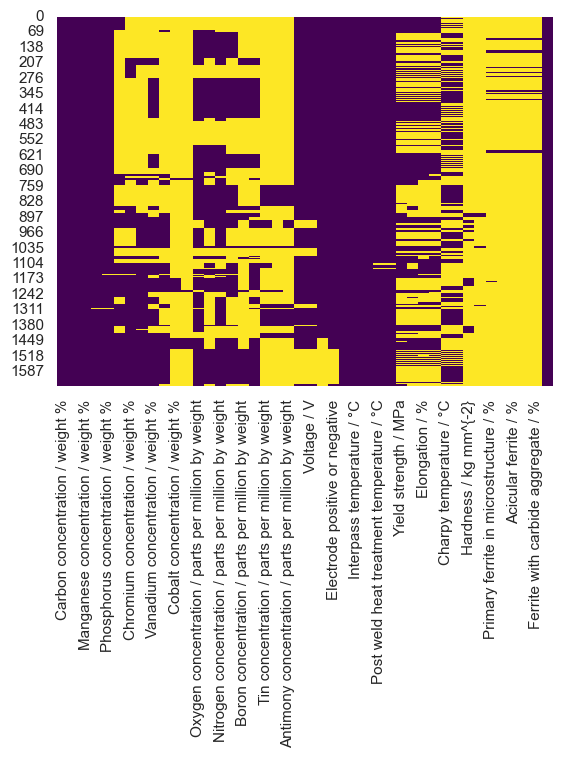

In [7]:
# Missing data heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [8]:
# In all non-numeric columns, print 10 first unique values that can not be converted to numeric, to see if we can convert them
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
        i = 0
        for value in df[column].unique():
            try:
                float(value)
            except ValueError:
                if i >= 15:
                    break
                i += 1
                print(value, ":", round(100*df[column].value_counts()[value]/len(df), 2), "%")
        print()

Sulphur concentration / weight %
<0.002 : 0.42 %

Molybdenum concentration / weight %
<0.01 : 0.12 %

Vanadium concentration / weight %
<0.0005 : 16.1 %
<0.01 : 1.88 %
<0.005 : 0.12 %
<5 : 0.54 %

Copper concentration / weight %
<0.01 : 0.85 %

Cobalt concentration / weight %
<0.01 : 1.27 %

Tungsten concentration / weight %
<0.1 : 0.73 %

Titanium concentration / parts per million by weight
<5 : 0.12 %
<100 : 3.03 %
<0.01 : 0.97 %
<10 : 0.12 %

Nitrogen concentration / parts per million by weight
67tot33res : 0.42 %
66totndres : 0.67 %
61tot34res : 0.42 %
54totndres : 0.36 %
54tot24res : 0.42 %
52tot18res : 0.42 %
50tot17res : 0.42 %
48tot18res : 0.42 %

Aluminium concentration / parts per million by weight
<5 : 20.76 %
<50 : 0.36 %
<100 : 2.3 %
<0.01 : 0.97 %

Boron concentration / parts per million by weight
<5 : 23.91 %
<10 : 1.45 %

Niobium concentration / parts per million by weight
<5 : 17.19 %
<6 : 0.18 %
<100 : 0.54 %
<50 : 0.18 %

Tin concentration / parts per million by weig

In [9]:
print("Electrode positive or negative")
display(df["Electrode positive or negative"].unique())




Electrode positive or negative


array(['+', '0', '-', nan], dtype=object)

In [10]:
# In columns with "<X" or ">X" values, replace them with the value of X. Try to convert the column to numeric type.
columns_to_convert = ["Sulphur concentration / weight %",
                      "Molybdenum concentration / weight %",
                      "Vanadium concentration / weight %",
                      "Copper concentration / weight %",
                      "Cobalt concentration / weight %",
                      "Tungsten concentration / weight %",
                      "Titanium concentration / parts per million by weight",
                      "Nitrogen concentration / parts per million by weight",
                      "Aluminium concentration / parts per million by weight",
                      "Boron concentration / parts per million by weight",
                      "Niobium concentration / parts per million by weight",
                      "Tin concentration / parts per million by weight",
                      "Arsenic concentration / parts per million by weight",
                      "Antimony concentration / parts per million by weight",
                      "Primary ferrite in microstructure / %",
                      "Electrode positive or negative",
                      "Interpass temperature / °C"
                      ]

# Remove columns that are not in the dataset from the list of columns to convert
columns_missing = [column for column in columns_to_convert if column not in df.columns]
columns_to_convert = [column for column in columns_to_convert if column in df.columns]
print("Columns missing from the dataset:", columns_missing)

df[columns_to_convert] = df[columns_to_convert].replace({'<': '', '>': ''}, regex=True)

# In the 'Hardness / kg mm^{-2}' column, keep characters up to the first non-numeric character, and convert the column to numeric type.
df['Hardness / kg mm^{-2}'] = df['Hardness / kg mm^{-2}'].str.extract('(\d+)', expand=False)
df['Hardness / kg mm^{-2}'] = pd.to_numeric(df['Hardness / kg mm^{-2}'], errors='coerce')

# Do the same for the 'Nitrogen concentration / parts per million by weight' column. 'tot' is most likely Total and 'res' is most likely Residual.
# Number of rows with 'res' is negligible, so we will just keep the total concentration.
index = df['Nitrogen concentration / parts per million by weight'].str.contains('tot', na=False)
values_before_conversion = df.loc[index, 'Nitrogen concentration / parts per million by weight'].unique()

df['Nitrogen concentration / parts per million by weight'] = df['Nitrogen concentration / parts per million by weight'].str.extract('(\d+)', expand=False)
df['Nitrogen concentration / parts per million by weight'] = pd.to_numeric(df['Nitrogen concentration / parts per million by weight'], errors='coerce')

# Print the converted values to see if they are correct.
print("Nitrogen concentration values before conversion:")
print(values_before_conversion)
print("Values after conversion:")
print(df.loc[index, 'Nitrogen concentration / parts per million by weight'].unique())
print()

# Replace + and - with 1 and -1 in the 'Electrode positive or negative' column
# This is an ordinal column, so we can convert it to numeric type.
df['Electrode positive or negative'] = df['Electrode positive or negative'].replace({'+': 1, '-': -1})

# For each row with a '-' between two numbers, calculate the average of those two numbers and replace the string with the average in the 'Interpass temperature / °C' column.
index = df['Interpass temperature / °C'].str.contains('-', na=False)
values_before_conversion = df.loc[index, 'Interpass temperature / °C'].unique()
df.loc[index, 'Interpass temperature / °C'] = df.loc[index, 'Interpass temperature / °C'].str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2)

# Print the converted values to see if they are correct.
print("Interpass temperature / °C values before conversion:")
print(values_before_conversion)
print("Values after conversion:")
print(df.loc[index, 'Interpass temperature / °C'].unique())
print()

for column in columns_to_convert:
    # If can not convert to numeric, cancel the conversion
    try:
        df[column] = pd.to_numeric(df[column], errors='raise')
    except ValueError:
        print("Can not convert column", column)
        continue

df.info()

Columns missing from the dataset: []
Nitrogen concentration values before conversion:
['67tot33res' '66totndres' '61tot34res' '54totndres' '54tot24res'
 '52tot18res' '50tot17res' '48tot18res']
Values after conversion:
[67. 66. 61. 54. 52. 50. 48.]

Interpass temperature / °C values before conversion:
['150-200']
Values after conversion:
[175.0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Carbon concentration / weight %                        1652 non-null   float64
 1   Silicon concentration / weight %                       1652 non-null   float64
 2   Manganese concentration / weight %                     1652 non-null   float64
 3   Sulphur concentration / weight %                       1648 non-null   float64
 4   Phosphorus concentration / weight % 

In [11]:
# Get descriptive statistics for numerical columns
df.describe()

,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,...,Reduction of Area / %,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %
count,1652.000000,1652.000000,1652.000000,1648.000000,1642.000000,697.000000,784.000000,793.000000,928.000000,578.000000,...,705.000000,879.000000,879.00000,138.000000,31.000000,98.000000,90.000000,90.000000,89.000000,89.000000
mean,0.075521,0.328577,1.202821,0.009529,0.012952,0.415034,2.101273,0.479172,0.097379,0.172163,...,71.799858,-34.606371,87.68942,226.905797,-31.096774,19.173469,25.955556,52.833333,0.337079,0.438202
std,0.023898,0.112455,0.382137,0.011226,0.019627,0.786951,3.026548,0.477404,0.492889,0.322933,...,8.926551,34.738624,50.11670,57.748370,43.644285,10.982672,21.283486,23.483798,3.179994,1.397685
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,-114.000000,3.00000,143.000000,-126.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.000500,0.000000,...,68.000000,-60.000000,38.00000,194.500000,-62.000000,13.000000,9.000000,35.500000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.067000,0.530000,0.340000,0.009500,0.030000,...,75.000000,-40.000000,100.00000,224.000000,-15.000000,19.000000,18.000000,60.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.260000,2.300000,1.010000,0.044000,0.180000,...,78.000000,-17.500000,100.00000,241.000000,5.000000,23.750000,38.000000,71.750000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,5.000000,1.630000,...,83.000000,188.000000,270.00000,467.000000,30.000000,48.000000,100.000000,88.000000,30.000000,8.000000


In [12]:
# Display column names to verify units
print("Column Names and Units:")
for col in df.columns:
    print(f"- {col}")

Column Names and Units:
- Carbon concentration / weight %
- Silicon concentration / weight %
- Manganese concentration / weight %
- Sulphur concentration / weight %
- Phosphorus concentration / weight %
- Nickel concentration / weight %
- Chromium concentration / weight %
- Molybdenum concentration / weight %
- Vanadium concentration / weight %
- Copper concentration / weight %
- Cobalt concentration / weight %
- Tungsten concentration / weight %
- Oxygen concentration / parts per million by weight
- Titanium concentration / parts per million by weight
- Nitrogen concentration / parts per million by weight
- Aluminium concentration / parts per million by weight
- Boron concentration / parts per million by weight
- Niobium concentration / parts per million by weight
- Tin concentration / parts per million by weight
- Arsenic concentration / parts per million by weight
- Antimony concentration / parts per million by weight
- Current / A
- Voltage / V
- AC or DC
- Electrode positive or ne

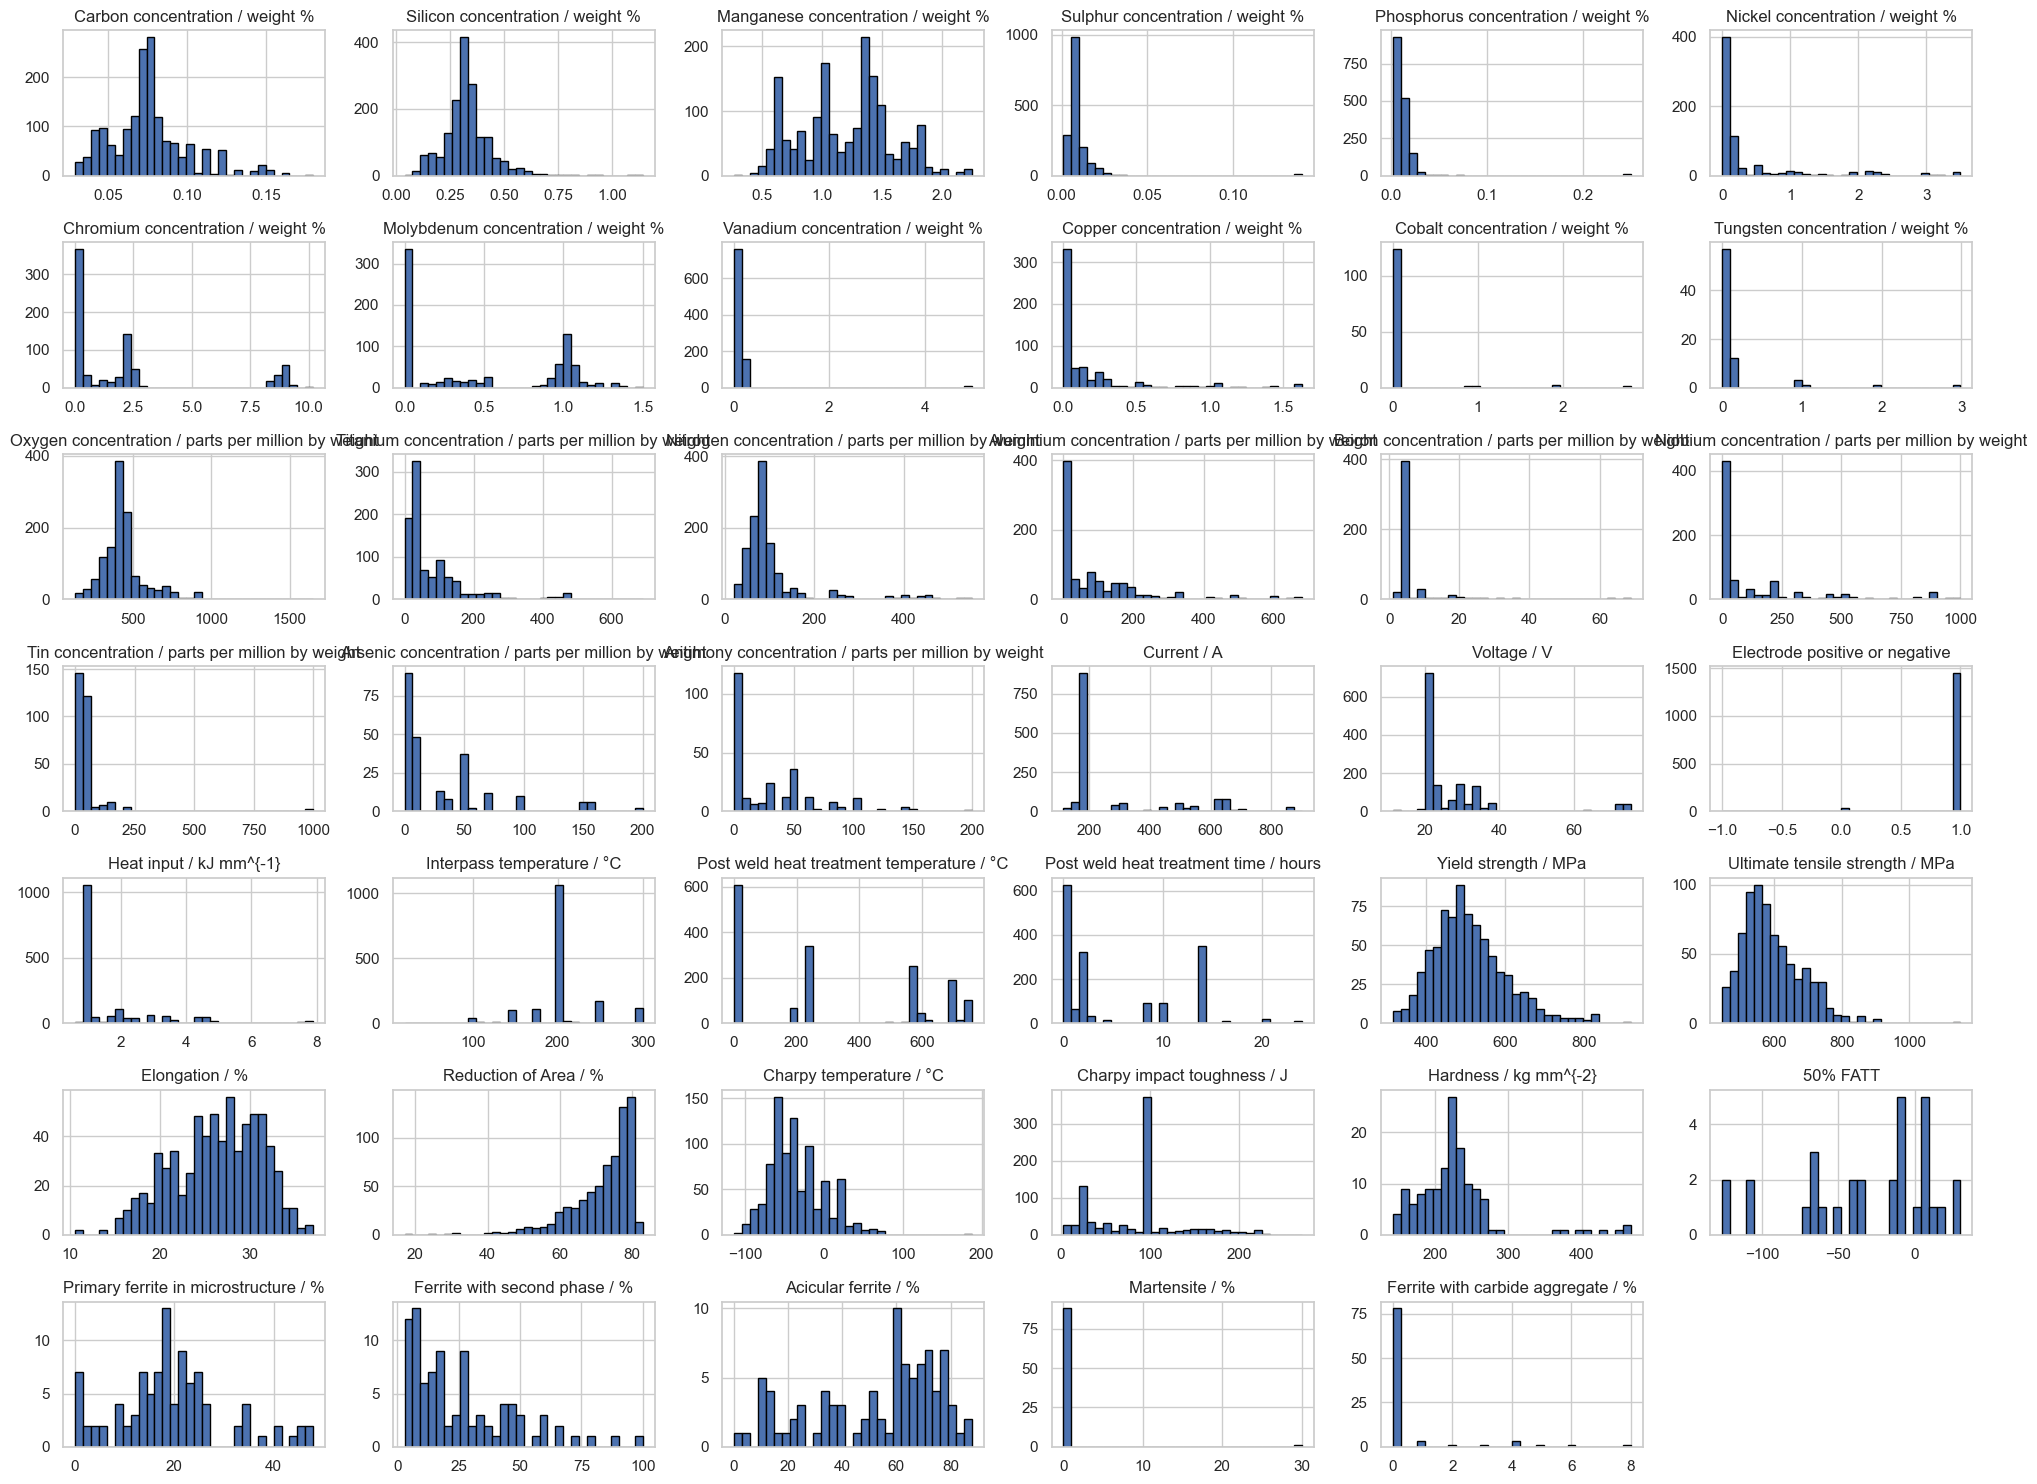

In [13]:
# Plot histograms for numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_cols].hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Identifying Variables Representing Weld Quality

## Actions:

- Determine variables indicative of weld quality (e.g., mechanical properties).
- Understand the significance of these variables in the context of welding.
- Analyze correlations between potential target variables and features.

## Strategy Development:
- Select the target variable(s) for prediction.
- Justify the choice based on data availability and relevance.
- Plan the approach to predict weld quality from identified variables.
  

In [14]:
df.columns

Index(['Carbon concentration / weight %', 'Silicon concentration / weight %',
       'Manganese concentration / weight %',
       'Sulphur concentration / weight %',
       'Phosphorus concentration / weight %',
       'Nickel concentration / weight %', 'Chromium concentration / weight %',
       'Molybdenum concentration / weight %',
       'Vanadium concentration / weight %', 'Copper concentration / weight %',
       'Cobalt concentration / weight %', 'Tungsten concentration / weight %',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight',
       'Aluminium concentration / parts per million by weight',
       'Boron concentration / parts per million by weight',
       'Niobium concentration / parts per million by weight',
       'Tin concentration / parts per million by weight',
       'Arsenic concentration / parts per million by weight',
       'Anti

In [15]:
# List potential weld quality variables
potential_targets = [
    'Yield strength / MPa',
    'Ultimate tensile strength / MPa',
    'Elongation / %',
    'Reduction of Area / %',
    'Charpy impact toughness / J',
    '50% FATT',
]

# Check availability and missing values of potential target variables
missing_values_targets = df[potential_targets].isnull().sum()
print("Missing values in potential target variables (out of", len(df), "rows):")
print(missing_values_targets)

Missing values in potential target variables (out of 1652 rows):
Yield strength / MPa                872
Ultimate tensile strength / MPa     914
Elongation / %                      952
Reduction of Area / %               947
Charpy impact toughness / J         773
50% FATT                           1621
dtype: int64


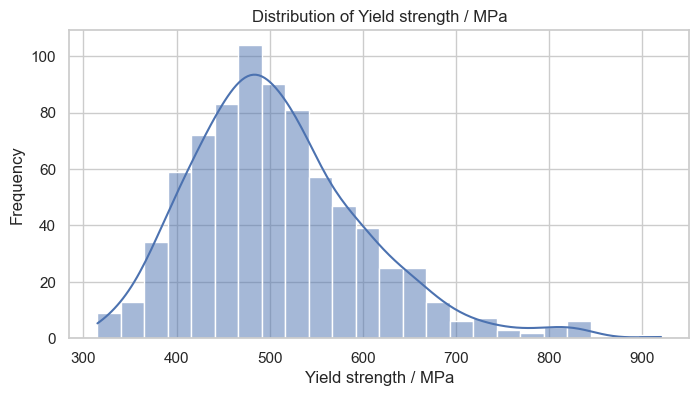

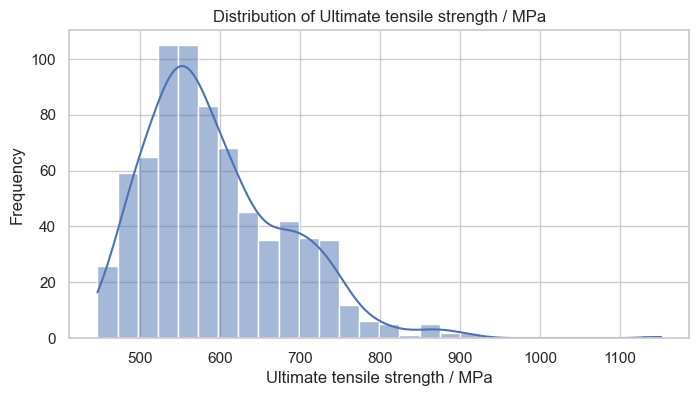

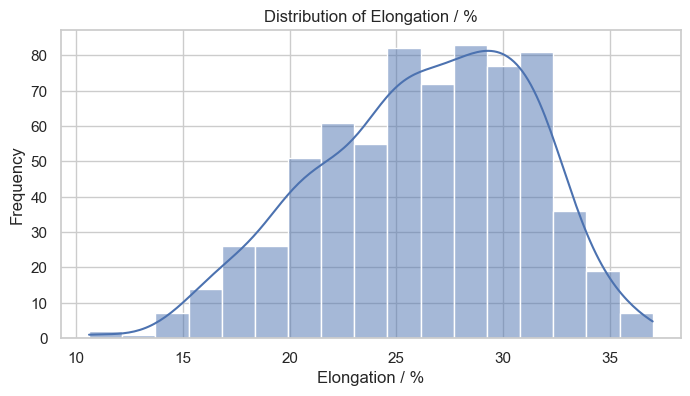

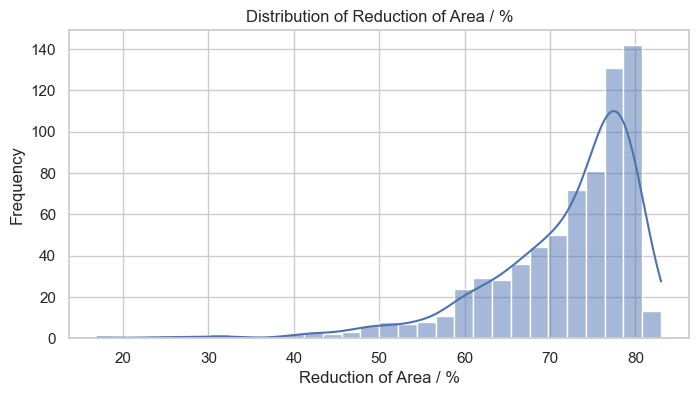

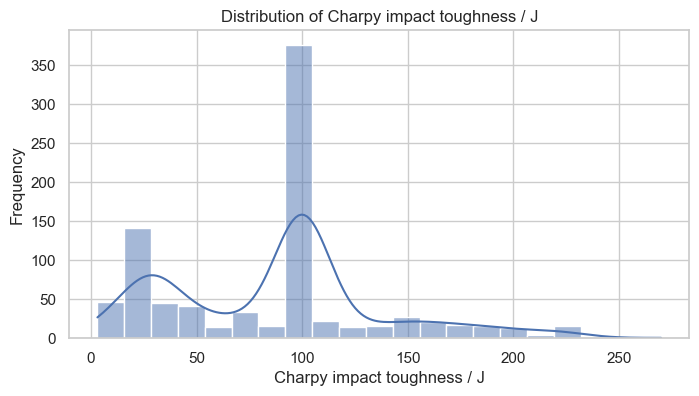

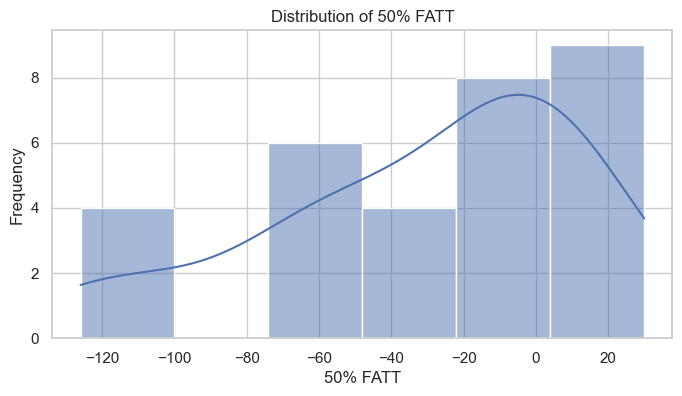

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each potential target variable
for target in potential_targets:
    if target in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[target], kde=True)
        plt.title(f'Distribution of {target}')
        plt.xlabel(target)
        plt.ylabel('Frequency')
        plt.show()


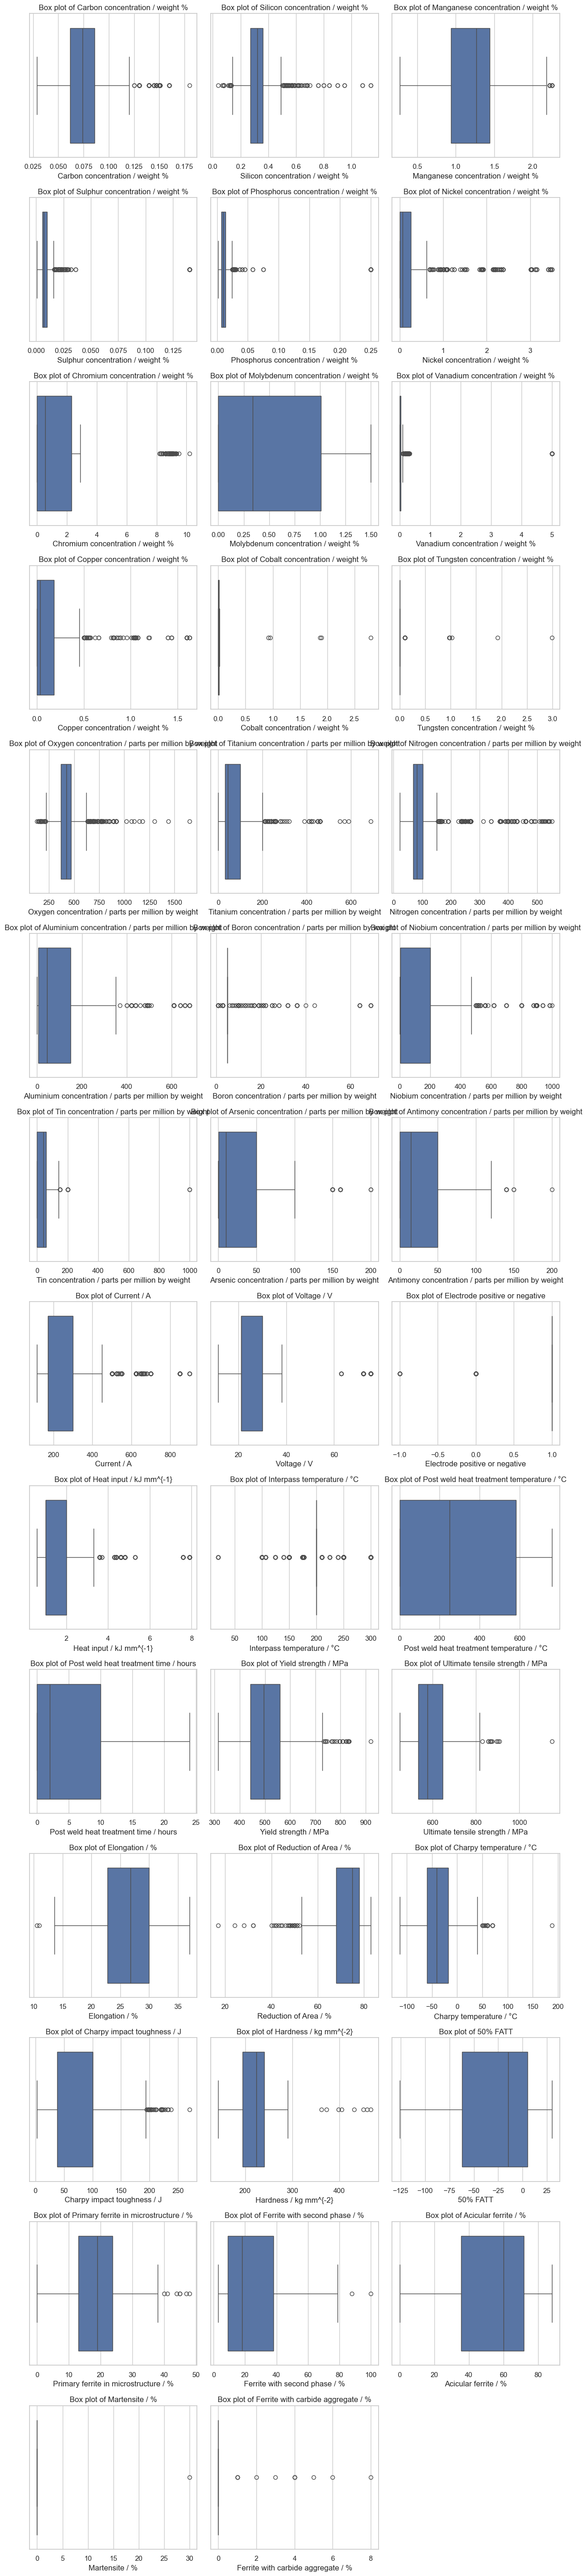

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot with 2 columns
num_plots = len(numerical_cols)
rows = (num_plots + 1) // 3  # Calculate the number of rows based on the number of columns

fig, axes = plt.subplots(rows, 3, figsize=(12, rows * 4))
axes = axes.flatten()

# Plot each numerical column in a boxplot
for i, column in enumerate(numerical_cols):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}', fontsize=12)
    axes[i].set_xlabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [18]:
# Number of values above threshold (checking the outliers)
var = 'Vanadium concentration / weight %'
threshold = 4
print(f"Number of {var} values above 0.125:", (df[var] > threshold).sum())
df[df[var] > threshold]

Number of Vanadium concentration / weight % values above 0.125: 9


,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
1616,0.076,0.26,1.49,0.008,0.008,0.0,0.0,0.25,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+.25Mo
1617,0.076,0.26,1.49,0.008,0.008,0.0,0.0,0.25,5.0,0.0,...,-69.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+.25Moch1
1618,0.076,0.26,1.49,0.008,0.008,0.0,0.0,0.25,5.0,0.0,...,-86.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+.25Moch2
1619,0.075,0.26,1.46,0.008,0.007,0.0,0.0,0.50,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+.5Mo
1620,0.075,0.26,1.46,0.008,0.007,0.0,0.0,0.50,5.0,0.0,...,-56.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+.5Moch1
1621,0.075,0.26,1.46,0.008,0.007,0.0,0.0,0.50,5.0,0.0,...,-90.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+.5Moch2
1622,0.075,0.25,1.44,0.008,0.008,0.0,0.0,1.07,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Mo
1623,0.075,0.25,1.44,0.008,0.008,0.0,0.0,1.07,5.0,0.0,...,-39.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Moch1
1624,0.075,0.25,1.44,0.008,0.008,0.0,0.0,1.07,5.0,0.0,...,-85.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Moch2


In [19]:
# Number of values above threshold (checking the outliers)
var = 'Ultimate tensile strength / MPa'
threshold = 1000
print(f"Number of {var} values above 0.125:", (df[var] > threshold).sum())
df[df[var] > threshold]

Number of Ultimate tensile strength / MPa values above 0.125: 1


,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID
722,0.095,0.16,1.02,0.007,0.012,3.01,9.17,0.96,0.19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-AlEl9Cr1Mo-1994-3Ni


In [20]:
from scipy.stats.mstats import winsorize

# Winsorize the values of Sulphur concentration / weight % above 0.125
# Winsorize the values of Phosphorus concentration / weight % above 0.2
# Winsorize the values of Vanaidum concentration / weight % above 4

ultimate_tensile_strength_backup = df['Ultimate tensile strength / MPa'].copy()

# Apply Winsorization (cap outliers to 5% and 95% percentiles)
for col in ['Sulphur concentration / weight %', 'Phosphorus concentration / weight %', 'Vanadium concentration / weight %', 'Ultimate tensile strength / MPa', 'Reduction of Area / %']:
    # df[col] = winsorize(df[col], limits=[0.0025, 0.0025])
    pass

In [21]:
# Changed values of Ultimate tensile strength / MPa
print("Count of not NaN changed values of Ultimate tensile strength / MPa:")
print((ultimate_tensile_strength_backup[ultimate_tensile_strength_backup.notna()] != df['Ultimate tensile strength / MPa'][ultimate_tensile_strength_backup.notna()]).sum())

Count of not NaN changed values of Ultimate tensile strength / MPa:
0


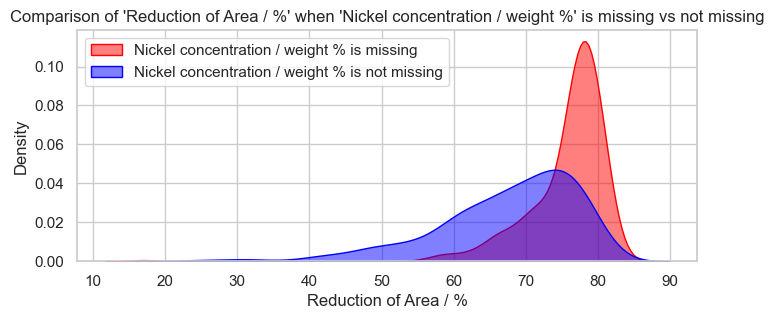

Mean and median of Reduction of Area / % when Nickel concentration / weight % is missing:
0.393717277486911 77.0
Mean and median of Reduction of Area / % when Nickel concentration / weight % is not missing:
0.4720229555236729 69.0
Mean change rate: 0.12208439857336734 Median change rate: 0.11594202898550725


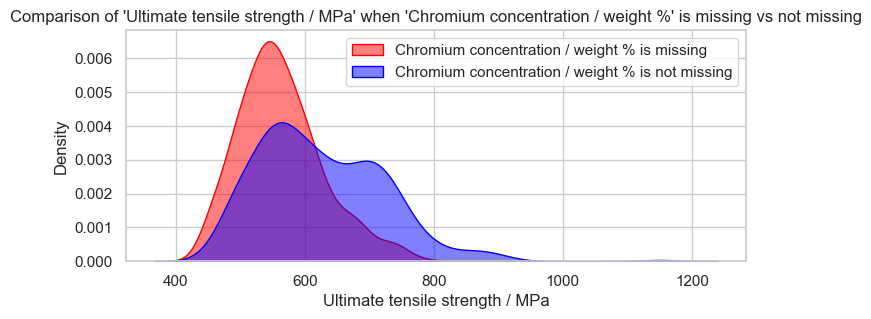

Mean and median of Ultimate tensile strength / MPa when Chromium concentration / weight % is missing:
0.4216589861751152 554.0
Mean and median of Ultimate tensile strength / MPa when Chromium concentration / weight % is not missing:
0.4744897959183674 613.0
Mean change rate: -0.10061334077703124 Median change rate: -0.09624796084828711


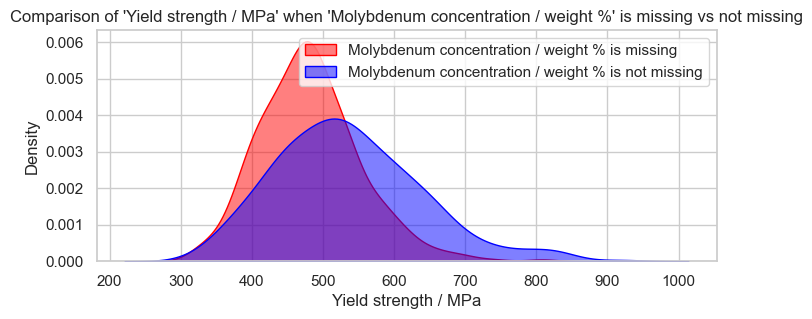

Mean and median of Yield strength / MPa when Molybdenum concentration / weight % is missing:
0.4481955762514552 478.0
Mean and median of Yield strength / MPa when Molybdenum concentration / weight % is not missing:
0.49810844892812106 525.0
Mean change rate: -0.10008624100927897 Median change rate: -0.08952380952380952


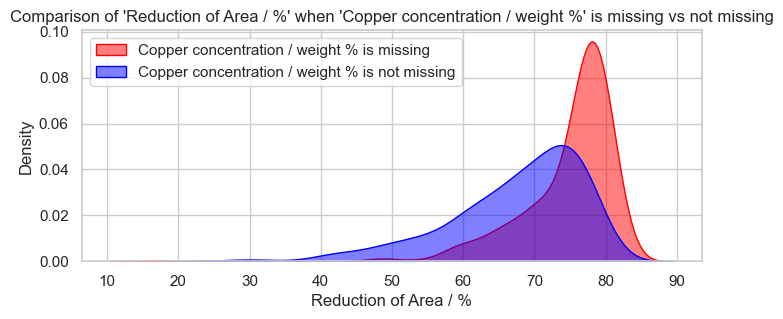

Mean and median of Reduction of Area / % when Copper concentration / weight % is missing:
0.3985102420856611 77.0
Mean and median of Reduction of Area / % when Copper concentration / weight % is not missing:
0.47923875432525953 69.7
Mean change rate: 0.10584787164969693 Median change rate: 0.10473457675753224


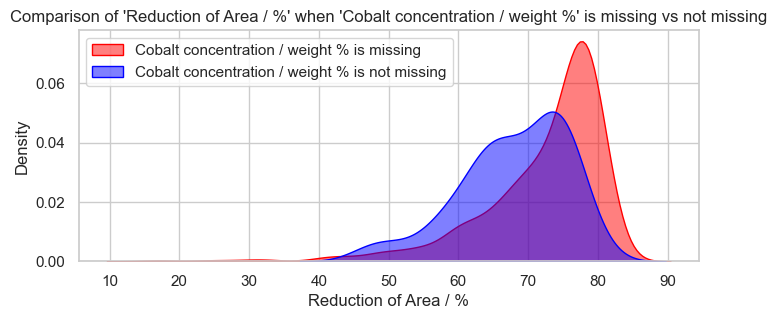

Mean and median of Reduction of Area / % when Cobalt concentration / weight % is missing:
0.41365725541694026 75.9
Mean and median of Reduction of Area / % when Cobalt concentration / weight % is not missing:
0.5813953488372093 69.0
Mean change rate: 0.06504015974070206 Median change rate: 0.10000000000000009


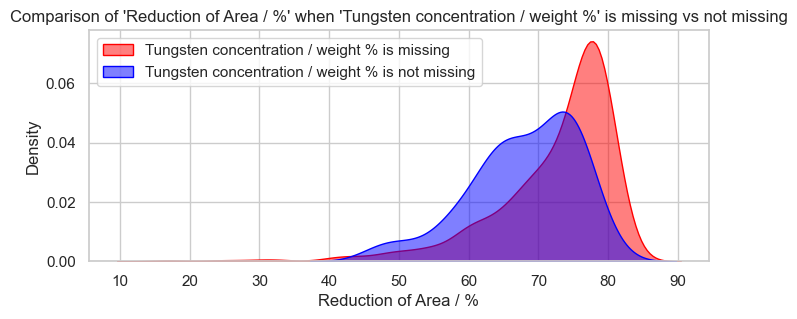

Mean and median of Reduction of Area / % when Tungsten concentration / weight % is missing:
0.39949270767279643 75.9
Mean and median of Reduction of Area / % when Tungsten concentration / weight % is not missing:
1.0 69.0
Mean change rate: 0.06504015974070183 Median change rate: 0.10000000000000009


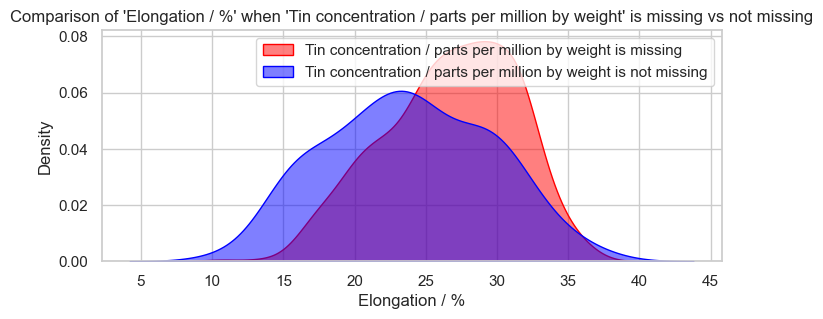

Mean and median of Elongation / % when Tin concentration / parts per million by weight is missing:
0.4424778761061947 27.1
Mean and median of Elongation / % when Tin concentration / parts per million by weight is not missing:
0.33783783783783783 24.0
Mean change rate: 0.1214126643976637 Median change rate: 0.12916666666666674


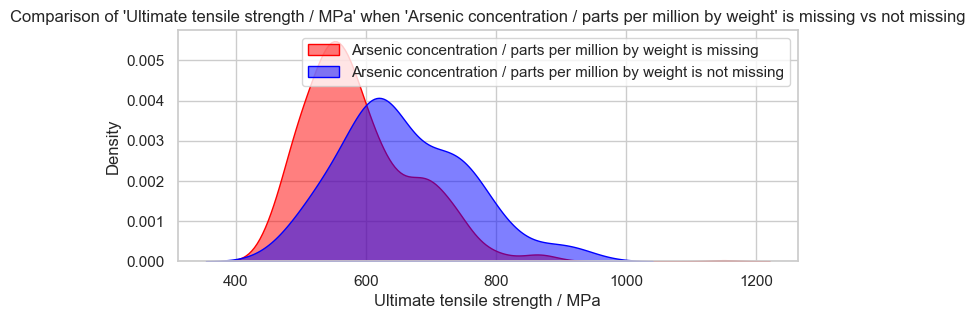

Mean and median of Ultimate tensile strength / MPa when Arsenic concentration / parts per million by weight is missing:
0.4844851904090268 570.0
Mean and median of Ultimate tensile strength / MPa when Arsenic concentration / parts per million by weight is not missing:
0.21794871794871795 635.0
Mean change rate: -0.10449000106634491 Median change rate: -0.10236220472440945


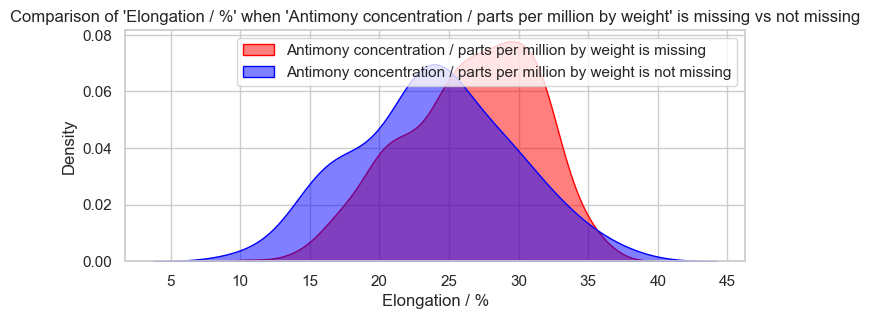

Mean and median of Elongation / % when Antimony concentration / parts per million by weight is missing:
0.45689655172413796 27.0
Mean and median of Elongation / % when Antimony concentration / parts per million by weight is not missing:
0.24615384615384617 24.0
Mean change rate: 0.10916773859104519 Median change rate: 0.125


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target variable
target = "Yield strength / MPa"

interesting_missingness = set()

# The threshold for the change rate of the mean and median of the target variable when the feature is missing
threshold = 0.1

# Loop through each feature in the dataset
for feature in [x for x in numerical_cols if x not in potential_targets]:
    for target in potential_targets:
        if feature != target:  # Skip the target column itself

            if target == "Charpy impact toughness / J":
                continue

            # Skip if the number of missing values is less than 50, or the number of non-missing values is less than 50
            if df[feature].isna().sum() < 50 or df[feature].notna().sum() < 50:
                continue

            # Skip if the number of target non missing values when the feature is missing is less than 50, or the number of target non missing values when the feature is not missing is less than 50
            if df[df[feature].isna()][target].notna().sum() < 50 or df[df[feature].notna()][target].notna().sum() < 50:
                continue


            mean_change_rate = (df[df[feature].isna()][target].mean() - df[df[feature].notna()][target].mean()) / df[df[feature].notna()][target].mean()
            median_change_rate = (df[df[feature].isna()][target].median() - df[df[feature].notna()][target].median()) / df[df[feature].notna()][target].median()

            if abs(mean_change_rate) < threshold and abs(median_change_rate) < threshold:
                # Skip the feature if the change rate is less than 10%, missingness does not seem to affect the target
                continue

            # Skip if mean_change_rate is NaN and median_change_rate is NaN
            if np.isnan(mean_change_rate) and np.isnan(median_change_rate):
                continue

            if feature in interesting_missingness:
                # Skip if the feature is already in the list of interesting missingness
                continue

            # Add the feature to the list of interesting missingness
            interesting_missingness.add(feature)

            plt.figure(figsize=(8, 3))
            
            # Check if the feature is missing (NaN) and plot the distribution for missing values
            sns.kdeplot(
                df[df[feature].isna()][target], 
                label=f'{feature} is missing', 
                color='red', 
                fill=True, 
                alpha=0.5
            )
            
            # Plot the distribution for non-missing values
            sns.kdeplot(
                df[df[feature].notna()][target], 
                label=f'{feature} is not missing', 
                color='blue', 
                fill=True, 
                alpha=0.5
            )
            
            # Set plot title and labels
            plt.title(f"Comparison of '{target}' when '{feature}' is missing vs not missing")
            plt.xlabel(target)
            plt.ylabel('Density')
            plt.legend()
            
            # Show the plot
            plt.grid(True)
            plt.show()

            print("Mean and median of", target, "when", feature, "is missing:")
            print(df[df[feature].isna()][target].notna().mean(), df[df[feature].isna()][target].median())
            print("Mean and median of", target, "when", feature, "is not missing:")
            print(df[df[feature].notna()][target].notna().mean(), df[df[feature].notna()][target].median())

            print("Mean change rate:", mean_change_rate, "Median change rate:", median_change_rate)


In [70]:
# For each interesting missingness feature, add a new binary column indicating whether the feature is missing or not
for feature in interesting_missingness:
    df[f'{feature}_missing'] = df[feature].isna().astype(int)
    
print("interesting_missingness = ", list(interesting_missingness))

interesting_missingness =  ['Chromium concentration / weight %', 'Tungsten concentration / weight %', 'Copper concentration / weight %', 'Molybdenum concentration / weight %', 'Tin concentration / parts per million by weight', 'Antimony concentration / parts per million by weight', 'Nickel concentration / weight %', 'Arsenic concentration / parts per million by weight', 'Cobalt concentration / weight %']


# Understanding the Significance of Potential Target Variables

1. **Yield Strength / MPa**
   - *Definition*: Stress at which a material begins to deform plastically.
   - *Significance*: Indicates the load a weld can withstand before permanent deformation.
   - **Note**: This is measured via destructive testing (tensile tests), meaning it cannot be used directly as a feature in a predictive model for production welds because testing would destroy the weld. Therefore, a model predicting yield strength must rely on non-destructive features.

2. **Ultimate Tensile Strength / MPa**
   - *Definition*: Maximum stress a material can withstand while being stretched or pulled.
   - *Significance*: Reflects the maximum strength of the weld.
   - **Note**: Like yield strength, ultimate tensile strength requires a destructive tensile test. As a result, it cannot be used directly as a feature in production but can be predicted using non-destructive test data.

3. **Elongation / %**
   - *Definition*: Measure of ductility, the ability to deform before fracture.
   - *Significance*: Higher elongation means the weld can absorb more energy before failing.
   - **Note**: Elongation is also derived from a destructive tensile test, making it unsuitable for direct use as a feature in production settings. A predictive model should infer elongation using other non-destructive tests.

4. **Reduction of Area / %**
   - *Definition*: Percentage reduction of cross-sectional area at fracture.
   - *Significance*: Another measure of ductility and toughness.
   - **Note**: Since this is measured via destructive testing (tensile test), it cannot be directly used in a production predictive model but can be predicted using other non-destructive features.

5. **Charpy Impact Toughness / J**
   - *Definition*: Energy absorbed by the material during fracture in an impact test.
   - *Significance*: Indicates the material's ability to withstand sudden impacts, important for brittle fracture prevention.
   - **Note**: This test requires breaking the material, making it destructive. Thus, it cannot be directly measured in production welds. However, predicting Charpy toughness using non-destructive features is important in ensuring weld quality, especially in safety-critical applications.

---

### Reflection on Destructive vs. Non-Destructive Tests:

- **Destructive Tests**: Properties like yield strength, ultimate tensile strength, elongation, reduction of area, Charpy toughness, and 50% FATT are crucial for evaluating weld quality but can only be measured via destructive testing. Since these tests cannot be applied to production welds (as they break the material), these variables **cannot be directly used as features** in a predictive model for production.

- **Non-Destructive Tests**: Hardness, along with other non-destructive evaluation methods (e.g., ultrasonic, radiographic), can be safely measured on production welds. These features are practical to collect during production and can be used as inputs for the predictive model.

### **Conclusion**:

For the model to be useful in evaluating the quality of a weld **without breaking it**, the focus should be on building a predictive model using non-destructive features to infer mechanical properties that typically require destructive testing, such as tensile strength or Charpy impact toughness. By leveraging non-destructive data, we can ensure that the welds remain intact while still making reliable predictions about their quality.


In [24]:
# For each group of row where all features (excepted "Charpy temperature") are equal, replace missing value of "Yield strength / MPa", "Ultimate tensile strength / MPa", "Elongation / %", "Reduction of Area / %"
# with the median of the group.

# We do this because rows with the same group_id correspond to the same setup of experiment, and we don't want to leak information from the test set to the training set.
# We only want to test on unseen data.

import pandas as pd
pd.set_option('display.max_columns', None)

target_variables = potential_targets

# List of target columns where missing values need to be filled
target_columns_to_fill = ["Yield strength / MPa", "Ultimate tensile strength / MPa", "Elongation / %", "Reduction of Area / %"]

# Features to group by (excluding "Charpy temperature")
features_to_remove = ["Charpy temperature / °C", "group_id", "Weld ID", 'Hardness / kg mm^{-2}', '50% FATT']
features_to_group = [feature for feature in df.columns if feature not in features_to_remove + target_variables]

print("Features to group:", features_to_group)

df_grouped = df.copy()

# Add group_id column to the DataFrame (hash of the features to group by)
df_grouped["group_id"] = df_grouped[features_to_group].apply(lambda x: str(hash(str(tuple(x)))), axis=1)

df_grouped = df_grouped.groupby("group_id")

# Function to replace missing values in each group
def fill_missing_values_with_group_median(group):
    # For each target column, replace missing values with the median of the group
    for column in target_columns_to_fill:
        # If empty prevent "mean of empty slice" warning
        if group[column].isnull().all():
            continue

        # Calculate the median for the column in this group
        median_value = group[column].median()
        
        # Replace missing values with the median value (but don't overwrite existing values)
        group.fillna({column: median_value}, inplace=True)
    
    return group

# Apply the function to each group to fill missing values with the median
df_grouped_filled = df_grouped.apply(fill_missing_values_with_group_median)

# Reset the index if needed after grouping
# df_grouped_filled.reset_index(drop=True, inplace=True)

# Average size of groups:
print("Average size of groups:", df_grouped.size().mean())

# Ungroup the DataFrame
df_filled = df_grouped_filled.reset_index(drop=True)

df_filled.sort_values(by='group_id').head(15)

Features to group: ['Carbon concentration / weight %', 'Silicon concentration / weight %', 'Manganese concentration / weight %', 'Sulphur concentration / weight %', 'Phosphorus concentration / weight %', 'Nickel concentration / weight %', 'Chromium concentration / weight %', 'Molybdenum concentration / weight %', 'Vanadium concentration / weight %', 'Copper concentration / weight %', 'Cobalt concentration / weight %', 'Tungsten concentration / weight %', 'Oxygen concentration / parts per million by weight', 'Titanium concentration / parts per million by weight', 'Nitrogen concentration / parts per million by weight', 'Aluminium concentration / parts per million by weight', 'Boron concentration / parts per million by weight', 'Niobium concentration / parts per million by weight', 'Tin concentration / parts per million by weight', 'Arsenic concentration / parts per million by weight', 'Antimony concentration / parts per million by weight', 'Current / A', 'Voltage / V', 'AC or DC', 'Elect

/var/folders/_8/vpwl6kq551v_bt6m3llx5n9c0000gn/T/ipykernel_85108/1566777339.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped_filled = df_grouped.apply(fill_missing_values_with_group_median)


,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,Cobalt concentration / weight %,Tungsten concentration / weight %,Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Aluminium concentration / parts per million by weight,Boron concentration / parts per million by weight,Niobium concentration / parts per million by weight,Tin concentration / parts per million by weight,Arsenic concentration / parts per million by weight,Antimony concentration / parts per million by weight,Current / A,Voltage / V,AC or DC,Electrode positive or negative,Heat input / kJ mm^{-1},Interpass temperature / °C,Type of weld,Post weld heat treatment temperature / °C,Post weld heat treatment time / hours,Yield strength / MPa,Ultimate tensile strength / MPa,Elongation / %,Reduction of Area / %,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kg mm^{-2},50% FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID,Chromium concentration / weight %_missing,Tungsten concentration / weight %_missing,Copper concentration / weight %_missing,Molybdenum concentration / weight %_missing,Tin concentration / parts per million by weight_missing,Antimony concentration / parts per million by weight_missing,Nickel concentration / weight %_missing,Arsenic concentration / parts per million by weight_missing,Cobalt concentration / weight %_missing,group_id
0,0.088,0.35,1.38,0.004,0.022,0.00,0.00,0.00,0.0000,0.0,0.0,0.0,268.0,NaN,109.0,200.0,NaN,0.0,NaN,NaN,NaN,450.0,30.0,NaN,1.0,2.025,250.0,SA,200.0,1.0,456.0,563.0,30.2,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p13-RR82011,0,0,0,0,1,1,0,1,0,-100887808660785644
1,0.088,0.35,1.38,0.004,0.022,0.00,0.00,0.00,0.0000,0.0,0.0,0.0,268.0,NaN,109.0,200.0,NaN,0.0,NaN,NaN,NaN,450.0,30.0,NaN,1.0,2.025,250.0,SA,200.0,1.0,458.0,567.0,29.6,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p13-RR82011,0,0,0,0,1,1,0,1,0,-100887808660785644
2,0.076,0.25,1.48,0.008,0.006,0.95,0.00,0.00,0.0005,0.0,NaN,NaN,417.0,33.0,81.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,200.0,MMA,250.0,14.0,498.0,551.0,27.2,78.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Ni,0,1,0,0,1,1,0,1,1,-1025672718669787439
3,0.076,0.25,1.48,0.008,0.006,0.95,0.00,0.00,0.0005,0.0,NaN,NaN,417.0,33.0,81.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,200.0,MMA,250.0,14.0,498.0,551.0,27.2,78.9,-62.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Nich1,0,1,0,0,1,1,0,1,1,-1025672718669787439
4,0.076,0.25,1.48,0.008,0.006,0.95,0.00,0.00,0.0005,0.0,NaN,NaN,417.0,33.0,81.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,200.0,MMA,250.0,14.0,498.0,551.0,27.2,78.9,-94.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Nich2,0,1,0,0,1,1,0,1,1,-1025672718669787439
10,0.088,0.34,1.33,0.008,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,1.0,1.000,200.0,MMA,580.0,2.0,461.0,568.0,28.6,77.9,-20.0,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-StressRelief-1991-0.095Cch-20,1,1,1,1,1,1,1,1,1,-1045361774962260717
9,0.088,0.34,1.33,0.008,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,1.0,1.000,200.0,MMA,580.0,2.0,461.0,568.0,28.6,77.9,-40.0,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-StressRelief-1991-0.095Cch-40,1,1,1,1,1,1,1,1,1,-1045361774962260717
8,0.088,0.34,1.33,0.008,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,21.0,DC,1.0,1.000,200.0,MMA,580.0,2.0,461.0,568.0,28.6,77.9,-50.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Evans-StressRelief-1991-0.095Cch-50,1,1,1,1,1,1,1,1,1,-1045361774962260717
11,0.088,0.34,1.33,0.008,0.007

In [25]:
# Separate df into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

# Assuming 'group_id' is the column that identifies groups
group_id = df_filled['group_id']

# Initialize GroupShuffleSplit
gss = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)

# Perform the split based on group_id. We need to make sure that the same group is not present in both train and test sets.
for train_idx, test_idx in gss.split(df_filled, groups=group_id):
    X_train = df_filled.iloc[train_idx].drop(target_variables, axis=1)
    X_test = df_filled.iloc[test_idx].drop(target_variables, axis=1)
    
    Y_train = df_filled.iloc[train_idx][target_variables]
    Y_test = df_filled.iloc[test_idx][target_variables]

# Combine X and Y to form train and test datasets
train_data = pd.concat([X_train, Y_train], axis=1)
test_data = pd.concat([X_test, Y_test], axis=1)

# Check shapes and first few rows
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

train_data.head()


X_train shape: (1333, 48)
X_test shape: (319, 48)


,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,Cobalt concentration / weight %,Tungsten concentration / weight %,Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Aluminium concentration / parts per million by weight,Boron concentration / parts per million by weight,Niobium concentration / parts per million by weight,Tin concentration / parts per million by weight,Arsenic concentration / parts per million by weight,Antimony concentration / parts per million by weight,Current / A,Voltage / V,AC or DC,Electrode positive or negative,Heat input / kJ mm^{-1},Interpass temperature / °C,Type of weld,Post weld heat treatment temperature / °C,Post weld heat treatment time / hours,Charpy temperature / °C,Hardness / kg mm^{-2},Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggregate / %,Weld ID,Chromium concentration / weight %_missing,Tungsten concentration / weight %_missing,Copper concentration / weight %_missing,Molybdenum concentration / weight %_missing,Tin concentration / parts per million by weight_missing,Antimony concentration / parts per million by weight_missing,Nickel concentration / weight %_missing,Arsenic concentration / parts per million by weight_missing,Cobalt concentration / weight %_missing,group_id,Yield strength / MPa,Ultimate tensile strength / MPa,Elongation / %,Reduction of Area / %,Charpy impact toughness / J,50% FATT
0,0.088,0.35,1.38,0.004,0.022,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,268.0,NaN,109.0,200.0,NaN,0.0,NaN,NaN,NaN,450.0,30.0,NaN,1.0,2.025,250.0,SA,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p13-RR82011,0,0,0,0,1,1,0,1,0,-100887808660785644,456.0,563.0,30.2,75.0,NaN,NaN
1,0.088,0.35,1.38,0.004,0.022,0.00,0.0,0.0,0.0000,0.0,0.0,0.0,268.0,NaN,109.0,200.0,NaN,0.0,NaN,NaN,NaN,450.0,30.0,NaN,1.0,2.025,250.0,SA,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,p13-RR82011,0,0,0,0,1,1,0,1,0,-100887808660785644,458.0,567.0,29.6,74.0,NaN,NaN
2,0.076,0.25,1.48,0.008,0.006,0.95,0.0,0.0,0.0005,0.0,NaN,NaN,417.0,33.0,81.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,200.0,MMA,250.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Ni,0,1,0,0,1,1,0,1,1,-1025672718669787439,498.0,551.0,27.2,78.9,NaN,NaN
3,0.076,0.25,1.48,0.008,0.006,0.95,0.0,0.0,0.0005,0.0,NaN,NaN,417.0,33.0,81.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,200.0,MMA,250.0,14.0,-62.0,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Nich1,0,1,0,0,1,1,0,1,1,-1025672718669787439,498.0,551.0,27.2,78.9,100.0,NaN
4,0.076,0.25,1.48,0.008,0.006,0.95,0.0,0.0,0.0005,0.0,NaN,NaN,417.0,33.0,81.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,200.0,MMA,250.0,14.0,-94.0,NaN,NaN,NaN,NaN,NaN,NaN,EvansLetterC+1Nich2,0,1,0,0,1,1,0,1,1,-1025672718669787439,498.0,551.0,27.2,78.9,28.0,NaN


In [26]:
# Compute correlation matrix of all numerical features with target variables

X_and_Y_train = X_train.copy()
X_and_Y_train[target_variables] = Y_train.copy()

# Put targets at the end of the DataFrame
X_and_Y_train = X_and_Y_train[[col for col in X_and_Y_train if col not in target_variables and col in numerical_cols] + target_variables]

# Compute correlation matrix
corr_matrix = X_and_Y_train.corr()

# Plot heatmap using Plotly. Center the color scale at 0.
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    reversescale=True,
    zmid=0,
))

# Make it a square
fig.update_layout(
    autosize=False,
    width=1200,
    height=1200,
)

fig.update_layout(
    title='Correlation Matrix Heatmap (Interactive)',
    yaxis_nticks=len(corr_matrix.columns))

fig.show()


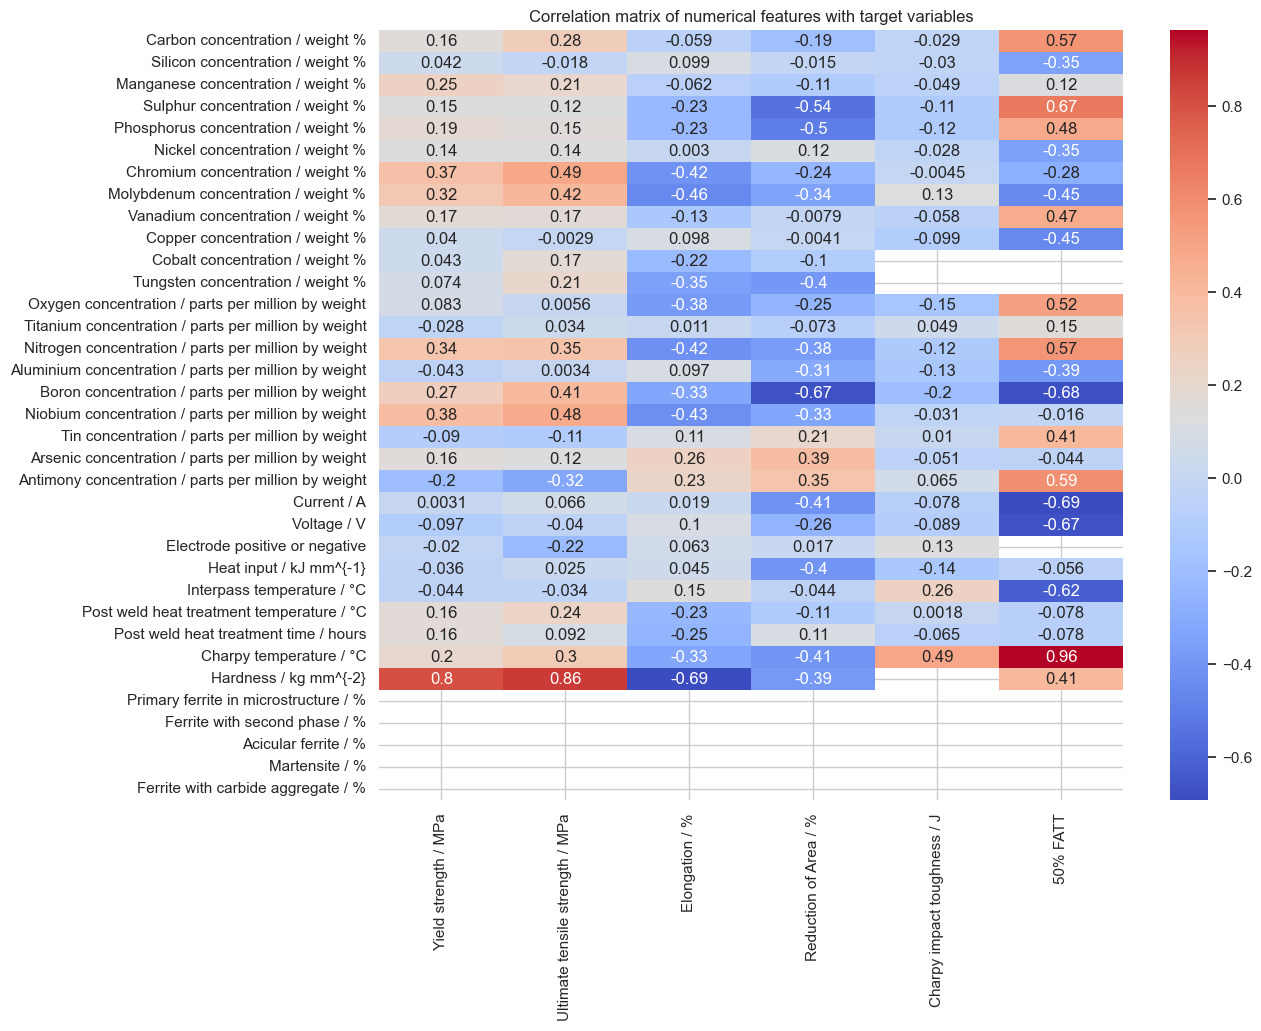

In [27]:
# Compute correlation matrix of scaled numerical features with target variables

X_and_Y_train = X_train.copy()
X_and_Y_train[target_variables] = Y_train.copy()

corr_matrix = X_and_Y_train[numerical_cols].corr()

# Show target_variables as columns and features as rows
corr_matrix = corr_matrix[target_variables].T.drop(target_variables, axis=1).T

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical features with target variables')
plt.show()


We notice that Charpy impact toughness (which could be good indicator of weld quality) is not correlated at all with any feature. This is probably due to the fact that Charpy tests are not all done at the same temperature, and Charpy impact toughness values can probably not be compared accurately when tests were done at different temperatures.

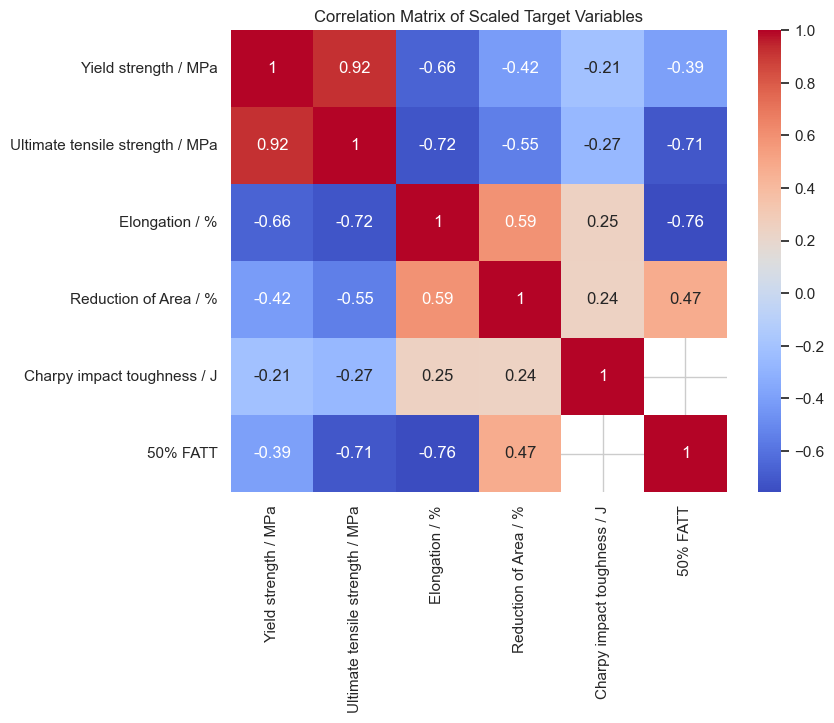

In [28]:
# Correlation of targets between each other
corr_matrix_targets = Y_train[target_variables].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_targets, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Scaled Target Variables')
plt.show()

In [29]:
target = 'Yield strength / MPa'
for categorical_variable in ["AC or DC", "Type of weld"]:
    if df[categorical_variable].dtype == 'object':
        fig = px.box(df, x=categorical_variable, y=target, title=f'Box plot of {categorical_variable} vs {target}')
        fig.show()


In [30]:
# Count missing values per column
missing_values = X_train.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Carbon concentration / weight %                                    0
Silicon concentration / weight %                                   0
Manganese concentration / weight %                                 0
Sulphur concentration / weight %                                   3
Phosphorus concentration / weight %                                8
Nickel concentration / weight %                                  750
Chromium concentration / weight %                                691
Molybdenum concentration / weight %                              669
Vanadium concentration / weight %                                579
Copper concentration / weight %                                  855
Cobalt concentration / weight %                                 1231
Tungsten concentration / weight %                               1271
Oxygen concentration / parts per million by weight               304
Titanium concentration / parts per million by weight             589
Nitroge

In [71]:

# Decide on a threshold for acceptable missing data (e.g., drop columns with >50% missing)
threshold = 0.80 * len(X_train)

# Drop columns with too many missing values
columns_to_keep = missing_values[missing_values <= threshold].index

removed_columns = missing_values[missing_values > threshold].index
print("Columns removed due to missing values:", removed_columns)

# Remove from numerical_cols the columns that were removed
numerical_cols = [col for col in numerical_cols if col not in removed_columns]

X_train = X_train[columns_to_keep]
X_test = X_test[columns_to_keep]

# numerical_cols_X is all numerical_cos present in X_train
numerical_cols_X = [col for col in X_train.columns if col in numerical_cols]
categorical_cols_X = X_train.select_dtypes(include=['object']).columns

# Impute missing values with median for numerical columns and mode for categorical columns
def impute_missing_values():
    global X_train, X_train_imputed, X_test, X_test_imputed

    X_train_imputed = X_train.copy()

    # Impute remaining missing values
    # For numerical columns, fill with median
    X_train_imputed[numerical_cols_X] = X_train[numerical_cols_X].fillna(X_train[numerical_cols_X].median())

    # For categorical columns, fill with mode
    X_train_imputed[categorical_cols_X] = X_train[categorical_cols_X].fillna(X_train[categorical_cols_X].mode().iloc[0])

    # Impute X_test in the same way
    X_test_imputed = X_test.copy()
    X_test_imputed[numerical_cols_X] = X_test[numerical_cols_X].fillna(X_train[numerical_cols_X].median())
    X_test_imputed[categorical_cols_X] = X_test[categorical_cols_X].fillna(X_train[categorical_cols_X].mode().iloc[0])

impute_missing_values()


Columns removed due to missing values: Index(['Cobalt concentration / weight %', 'Tungsten concentration / weight %',
       'Arsenic concentration / parts per million by weight',
       'Antimony concentration / parts per million by weight',
       'Hardness / kg mm^{-2}', 'Primary ferrite in microstructure / %',
       'Ferrite with second phase / %', 'Acicular ferrite / %',
       'Martensite / %', 'Ferrite with carbide aggregate / %'],
      dtype='object')
['Carbon concentration / weight %', 'Silicon concentration / weight %', 'Manganese concentration / weight %', 'Sulphur concentration / weight %', 'Phosphorus concentration / weight %', 'Nickel concentration / weight %', 'Chromium concentration / weight %', 'Molybdenum concentration / weight %', 'Vanadium concentration / weight %', 'Copper concentration / weight %', 'Oxygen concentration / parts per million by weight', 'Titanium concentration / parts per million by weight', 'Nitrogen concentration / parts per million by weight', 

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Impute missing values using MICE imputation
def impute_missing_values():
    global X_train, X_train_imputed, X_test, X_test_imputed

    # Initialize the MICE imputer (IterativeImputer)
    mice_imputer = IterativeImputer(random_state=42, max_iter=10)

    # Number of nan values before imputation
    print("Number of NaN values before imputation:")
    print(X_train.isnull().sum().sum())

    # Impute missing values in numerical columns
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Apply MICE imputation to numerical columns
    X_train_imputed[numerical_cols_X] = mice_imputer.fit_transform(X_train[numerical_cols_X])
    X_test_imputed[numerical_cols_X] = mice_imputer.transform(X_test[numerical_cols_X])

    # Number of nan values after imputation
    print("Number of NaN values after imputation:")
    print(X_train_imputed.isnull().sum().sum())

    # For categorical columns, fill with mode
    X_train_imputed[categorical_cols_X] = X_train[categorical_cols_X].fillna(X_train[categorical_cols_X].mode().iloc[0])
    X_test_imputed[categorical_cols_X] = X_test[categorical_cols_X].fillna(X_train[categorical_cols_X].mode().iloc[0])

# impute_missing_values()

In [33]:
from sklearn.impute import KNNImputer

# Impute missing values using KNN imputation
def impute_missing_values():
    global X_train, X_train_imputed, X_test, X_test_imputed

    # Initialize the KNN imputer
    knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

    # Number of nan values before imputation
    print("Number of NaN values before imputation:")
    print(X_train.isnull().sum().sum())

    # Impute missing values in numerical columns
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Apply KNN imputation to numerical columns
    X_train_imputed[numerical_cols_X] = knn_imputer.fit_transform(X_train[numerical_cols_X])
    X_test_imputed[numerical_cols_X] = knn_imputer.transform(X_test[numerical_cols_X])

    # Number of nan values after imputation
    print("Number of NaN values after imputation:")
    print(X_train_imputed.isnull().sum().sum())

    # For categorical columns, fill with mode
    X_train_imputed[categorical_cols_X] = X_train[categorical_cols_X].fillna(X_train[categorical_cols_X].mode().iloc[0])
    X_test_imputed[categorical_cols_X] = X_test[categorical_cols_X].fillna(X_train[categorical_cols_X].mode().iloc[0])

# impute_missing_values()

Number of NaN values before imputation:
9452
Number of NaN values after imputation:
172


In [56]:
# Since we will apply PCA, standardization is necessary
scaler_X = StandardScaler()

# Replace the original numerical columns with the scaled ones
X_train_scaled_imputed = X_train_imputed.copy()
X_train_scaled_imputed[numerical_cols_X] = scaler_X.fit_transform(X_train_imputed[numerical_cols_X])
X_test_scaled_imputed = X_test_imputed.copy()
X_test_scaled_imputed[numerical_cols_X] = scaler_X.transform(X_test_imputed[numerical_cols_X])

scaler_Y = StandardScaler()

Y_train_scaled = Y_train.copy()
Y_train_scaled[target_variables] = scaler_Y.fit_transform(Y_train[target_variables])
Y_test_scaled = Y_test.copy()
Y_test_scaled[target_variables] = scaler_Y.transform(Y_test[target_variables])

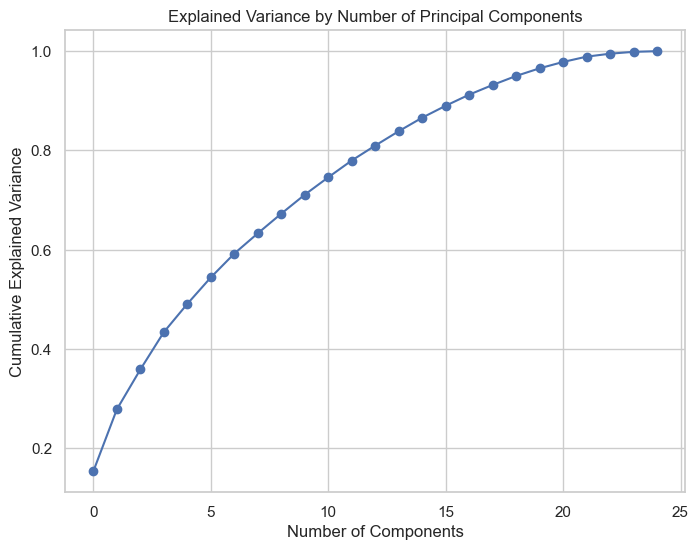

In [57]:
# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_train_scaled_imputed[numerical_cols_X])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

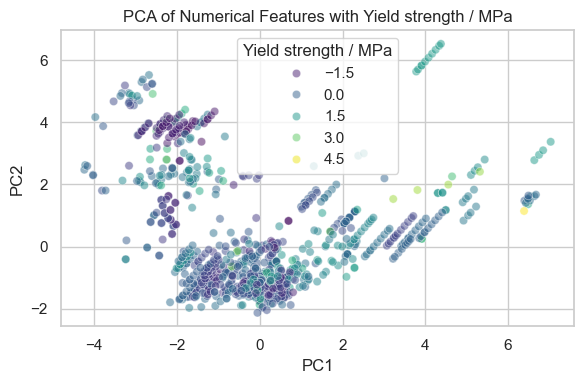

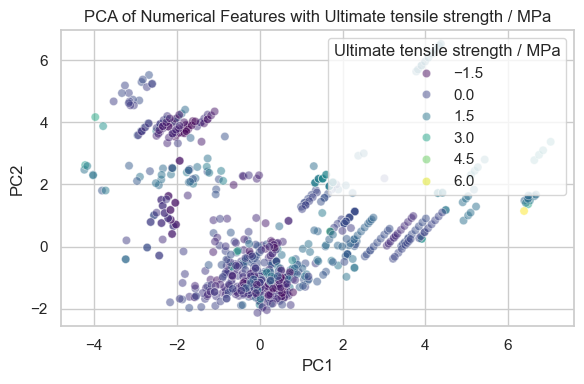

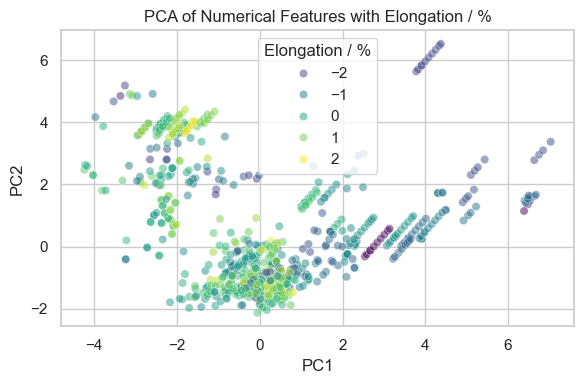

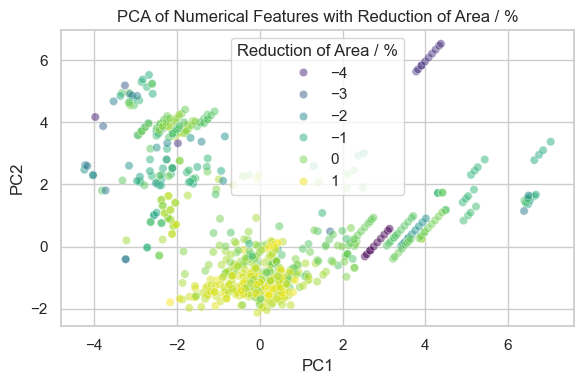

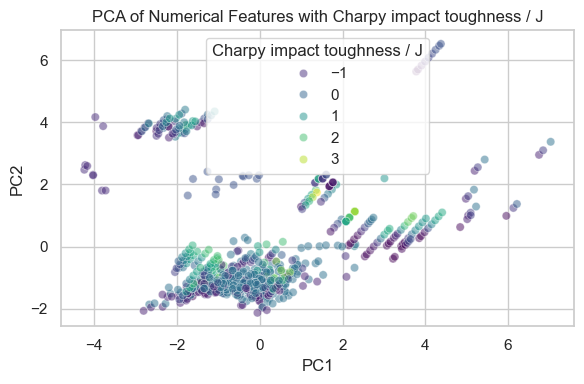

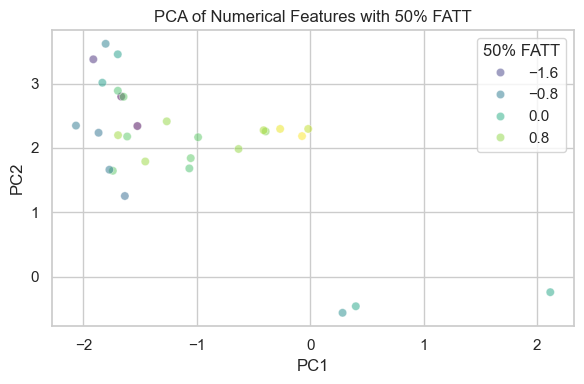

In [58]:
# Choose the number of components that explain a sufficient amount of variance
n_components = 2  # Adjust based on the cumulative explained variance

# Apply PCA with n_components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_train_scaled_imputed[numerical_cols_X])

# Create a DataFrame with principal components
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

# If a target variable exists, include it for visualization
# Assuming 'Charpy impact toughness / J' is the target variable
for target in target_variables:
    df_pca[target] = Y_train_scaled[target].values

    # Plot the first two principal components colored by the target variable
    fig, axes = plt.subplots(1, 1, figsize=(6, 4))
    sns.scatterplot(
        x='PC1', y='PC2',
        hue=target,
        palette='viridis',
        data=df_pca,
        legend='brief',
        alpha=0.5,
    )
    plt.title(f'PCA of Numerical Features with {target}')
    plt.tight_layout()
    plt.show()


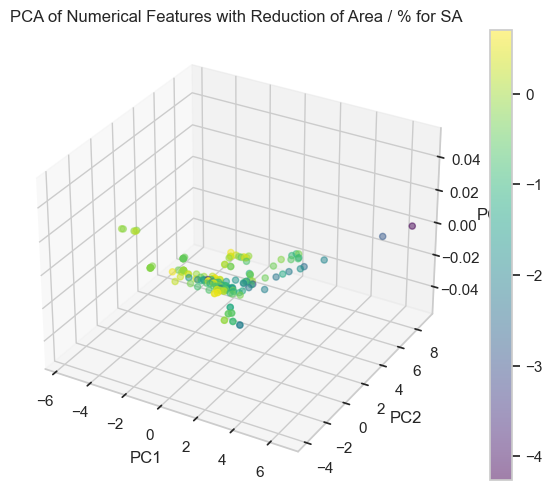

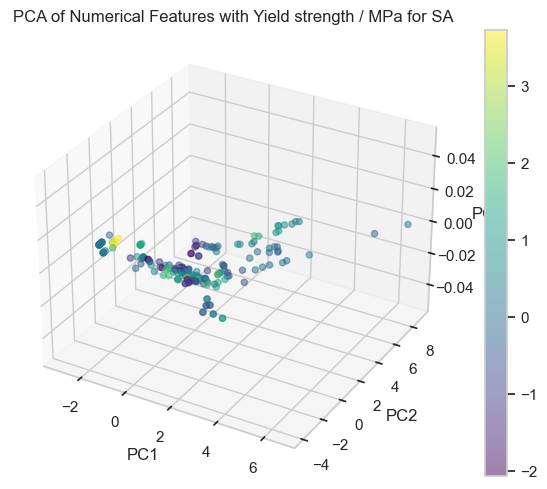

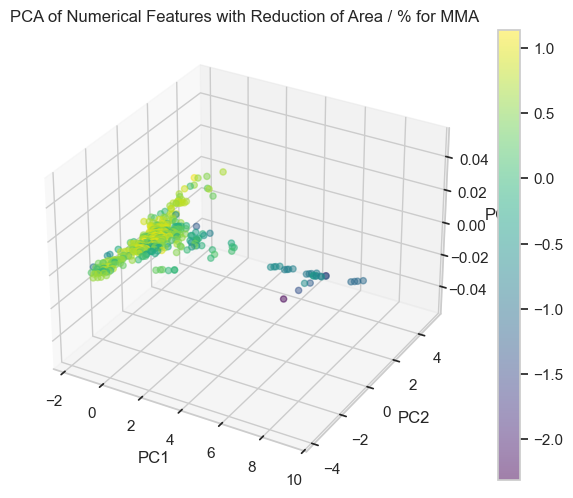

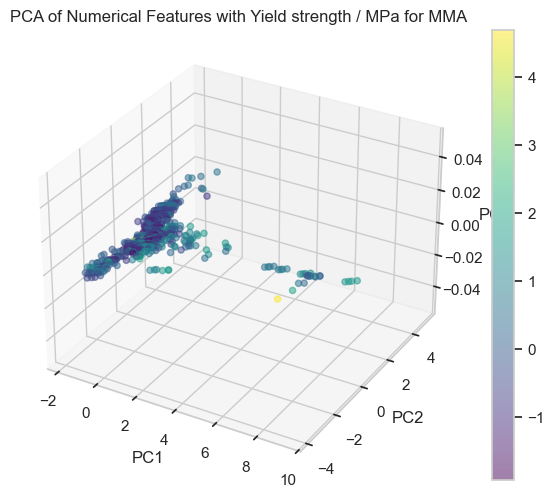

In [59]:
# Choose the number of components that explain a sufficient amount of variance
n_components = 3  # Adjust based on the cumulative explained variance

for type_of_weld in X_train_scaled_imputed['Type of weld'].unique():

    # If the number of rows is too low, skip
    if len(X_train_scaled_imputed[X_train_scaled_imputed['Type of weld'] == type_of_weld]) < 100:
        continue

    # Apply PCA with n_components
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X_train_scaled_imputed[X_train_scaled_imputed['Type of weld'] == type_of_weld][numerical_cols_X])

    # Create a DataFrame with principal components
    df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

    for target in ["Reduction of Area / %", "Yield strength / MPa"]:
        df_pca[target] = Y_train_scaled[X_train_scaled_imputed['Type of weld'] == type_of_weld][target].values

        # Plot the first three principal components colored by the target variable
        fig = plt.figure(figsize=(6, 5))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(
            xs=df_pca['PC1'],
            ys=df_pca['PC2'],
            # zs=df_pca['PC3'],
            c=df_pca[target],
            cmap='viridis',
            alpha=0.5,
        )
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        plt.title(f'PCA of Numerical Features with {target} for {type_of_weld}')
        plt.colorbar(scatter)
        plt.tight_layout()
        plt.show()



In [60]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Apply One-Hot Encoding to nominal categorical variables ('AC or DC', 'Type of weld')
nominal_cols_X = ['AC or DC', 'Type of weld']

# Manually specify categories including the ones missing from the training data
known_categories = [
    ['AC', 'DC'],  # Categories for 'AC or DC'
    ['MMA', 'FCA', 'ShMA', 'SAA', 'TSA', 'NGSAW', 'GMAA', 'SA', 'GTAA', 'NGGMA'],  # Categories for 'Type of weld'
]

# Create the OneHotEncoder with predefined categories
encoder = OneHotEncoder(categories=known_categories, drop='first', sparse_output=False)

print("Number of rows in X_train_scaled_imputed:", len(X_train_scaled_imputed))
print("Number of rows in X_test_scaled_imputed:", len(X_test_scaled_imputed))

# Apply the encoder on the nominal columns for the training data
X_train_encoded_nominal = pd.DataFrame(
    encoder.fit_transform(X_train_scaled_imputed[nominal_cols_X]),
    columns=encoder.get_feature_names_out(nominal_cols_X)
)

# Apply the encoder on the nominal columns for the test data
X_test_encoded_nominal = pd.DataFrame(
    encoder.transform(X_test_scaled_imputed[nominal_cols_X]),
    columns=encoder.get_feature_names_out(nominal_cols_X)
)

# Reset index before concatenating to avoid index mismatch
X_train_rest = X_train_scaled_imputed.drop(columns=nominal_cols_X).reset_index(drop=True)
X_train_encoded_nominal = X_train_encoded_nominal.reset_index(drop=True)

X_test_rest = X_test_scaled_imputed.drop(columns=nominal_cols_X).reset_index(drop=True)
X_test_encoded_nominal = X_test_encoded_nominal.reset_index(drop=True)

# Concatenate the encoded nominal columns with the rest of the dataframe
X_train_final = pd.concat([X_train_rest, X_train_encoded_nominal], axis=1)
X_test_final = pd.concat([X_test_rest, X_test_encoded_nominal], axis=1)

# Drop Weld ID column
X_train_final.drop(columns='Weld ID', inplace=True)
X_test_final.drop(columns='Weld ID', inplace=True)

print("Number of rows in X_train_final:", len(X_train_final))
print("Number of rows in X_test_final:", len(X_test_final))

# Show a preview of the final encoded training data with other columns
X_train_final.head()


Number of rows in X_train_scaled_imputed: 1333
Number of rows in X_test_scaled_imputed: 319
Number of rows in X_train_final: 1333
Number of rows in X_test_final: 319


,Carbon concentration / weight %,Silicon concentration / weight %,Manganese concentration / weight %,Sulphur concentration / weight %,Phosphorus concentration / weight %,Nickel concentration / weight %,Chromium concentration / weight %,Molybdenum concentration / weight %,Vanadium concentration / weight %,Copper concentration / weight %,Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Aluminium concentration / parts per million by weight,Boron concentration / parts per million by weight,Niobium concentration / parts per million by weight,Tin concentration / parts per million by weight,Current / A,Voltage / V,Electrode positive or negative,Heat input / kJ mm^{-1},Interpass temperature / °C,Post weld heat treatment temperature / °C,Post weld heat treatment time / hours,Charpy temperature / °C,Chromium concentration / weight %_missing,Tungsten concentration / weight %_missing,Copper concentration / weight %_missing,Molybdenum concentration / weight %_missing,Tin concentration / parts per million by weight_missing,Antimony concentration / parts per million by weight_missing,Nickel concentration / weight %_missing,Arsenic concentration / parts per million by weight_missing,Cobalt concentration / weight %_missing,group_id,AC or DC_DC,Type of weld_FCA,Type of weld_ShMA,Type of weld_SAA,Type of weld_TSA,Type of weld_NGSAW,Type of weld_GMAA,Type of weld_SA,Type of weld_GTAA,Type of weld_NGGMA
0,0.513073,0.234778,0.445378,-0.478469,0.396895,-0.398240,-0.580038,-1.192865,-0.155970,-0.385014,-1.310091,-0.294751,0.104342,1.242238,-0.179691,-0.376788,-0.016556,0.929811,0.214327,0.164882,0.205378,1.139221,-0.344692,-0.658986,-0.142464,0,0,0,0,1,1,0,1,0,-100887808660785644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.513073,0.234778,0.445378,-0.478469,0.396895,-0.398240,-0.580038,-1.192865,-0.155970,-0.385014,-1.310091,-0.294751,0.104342,1.242238,-0.179691,-0.376788,-0.016556,0.929811,0.214327,0.164882,0.205378,1.139221,-0.344692,-0.658986,-0.142464,0,0,0,0,1,1,0,1,0,-100887808660785644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.019367,-0.687861,0.704721,-0.152187,-0.347803,1.324152,-0.580038,-1.192865,-0.154495,-0.385014,-0.140388,-0.420328,-0.262300,-0.728992,-0.179691,-0.345490,-0.016556,-0.567599,-0.355353,0.164882,-0.570558,-0.103684,-0.169084,1.469274,-0.142464,0,1,0,0,1,1,0,1,1,-1025672718669787439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.019367,-0.687861,0.704721,-0.152187,-0.347803,1.324152,-0.580038,-1.192865,-0.154495,-0.385014,-0.140388,-0.420328,-0.262300,-0.728992,-0.179691,-0.345490,-0.016556,-0.567599,-0.355353,0.164882,-0.570558,-0.103684,-0.169084,1.469274,-0.997890,0,1,0,0,1,1,0,1,1,-1025672718669787439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019367,-0.687861,0.704721,-0.152187,-0.347803,1.324152,-0.580038,-1.192865,-0.154495,-0.385014,-0.140388,-0.420328,-0.262300,-0.728992,-0.179691,-0.345490,-0.016556,-0.567599,-0.355353,0.164882,-0.570558,-0.103684,-0.169084,1.469274,-2.242146,0,1,0,0,1,1,0,1,1,-1025672718669787439,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Part 3: Applying Machine Learning Approaches to Predict Weld Quality**

### **Overview**

In this section, we will apply various machine learning (ML) models to predict the quality of welds based on the preprocessed data. Given that the dataset is partially labeled (each target column is approximately half-filled and almost no row has all targets), we will:

1. **Focus on a Single Target Variable**: Due to the high number of missing values across multiple targets, we'll start by selecting the target variable with the most available data.
2. **Apply Supervised Learning Models**: Implement standard regression models.
3. **Implement Semi-Supervised Learning**: Utilize self-training techniques to leverage unlabeled data.
4. **Perform Rigorous Cross-Validation**: Ensure robust evaluation of model performance.
5. **Compare Model Performances**: Analyze and compare the effectiveness of different models using appropriate metrics.

---

### **Step 1: Selecting the Target Variable**

We'll choose **"Charpy impact toughness / J"** as our target variable since it has the most available data among the potential targets.

In [61]:
# Define the target variable
# Targets are ['Yield strength / MPa', 'Ultimate tensile strength / MPa', 'Elongation / %', 'Reduction of Area / %', 'Charpy impact toughness / J', '50% FATT']
target = target_variables[0]

# Order of predictions to use: 50% Fatt, Reduction of Area, Elongation, Ultimate tensile strength, Yield strength, Charpy impact toughness

# Y_train is a matrix with all target variables, y_train is a vector with a unique target variable
y_train = Y_train_scaled[target]
y_test = Y_test_scaled[target]

# Check the number of non-missing values for the target
non_missing_target = y_train.notnull().sum()
print(f"Number of non-missing values for '{target}': {non_missing_target} out of {len(df)}")

Number of non-missing values for 'Yield strength / MPa': 1043 out of 1652


In [62]:
# Separate labeled and unlabeled data
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
labeled_mask = y_train.notnull()

print("Shape of X_train_final:", X_train_final.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of labeled_mask:", labeled_mask.shape)

X_train_labeled = X_train_final[labeled_mask]
y_train_labeled = y_train[labeled_mask]

X_train_unlabeled = X_train_final[~labeled_mask]

print("Labeled training set shape:", X_train_labeled.shape)
print("Unlabeled training set shape:", X_train_unlabeled.shape)

labeled_mask_test = y_test.notnull()
X_test_labeled = X_test_final[labeled_mask_test]
y_test_labeled = y_test[labeled_mask_test]

print("Labeled test set shape:", X_test_labeled.shape)
print("Unlabeled test set shape:", X_test_final.shape)


# Export X_train_labeled, y_train_labeled to CSV for verification. Descale the features and target variables before exporting.
X_train_labeled_descaled = X_train_labeled.copy()
X_train_labeled_descaled[numerical_cols_X] = scaler_X.inverse_transform(X_train_labeled[numerical_cols_X])
# Put target in a DataFrame
# Create array of shape (len(y_train_labeled), len(target_variables))
y_train_labeled_df = np.zeros((len(y_train_labeled), len(target_variables)))
y_train_labeled_df[:, target_variables.index(target)] = y_train_labeled
y_train_labeled_df = scaler_Y.inverse_transform(y_train_labeled_df)
X_train_labeled_descaled[target] = y_train_labeled_df[:, target_variables.index(target)]

# X_train_labeled_descaled.to_csv('data/train_labeled.csv', index=False)


Shape of X_train_final: (1333, 45)
Shape of y_train: (1333,)
Shape of labeled_mask: (1333,)
Labeled training set shape: (1043, 45)
Unlabeled training set shape: (290, 45)
Labeled test set shape: (226, 45)
Unlabeled test set shape: (319, 45)


In [63]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()  # Adjust based on explained variance

# Fit PCA on labeled training data and transform
X_train_labeled_pca = pca.fit_transform(X_train_labeled[numerical_cols_X])

# Transform the unlabeled training data
X_train_unlabeled_pca = pca.transform(X_train_unlabeled[numerical_cols_X])

# Transform the test data
X_test_labeled_pca = pca.transform(X_test_labeled[numerical_cols_X])
X_test_unlabeled_pca = pca.transform(X_test_final[numerical_cols_X])

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by the first {len(explained_variance)} principal components: {explained_variance}")

columns_not_in_pca = [col for col in X_train_labeled.columns if col not in numerical_cols_X]

# The number of principal components to keep (keep all)
n_components = len(explained_variance)

# Add the columns not in PCA to the PCA DataFrame
columns = [f'PC{i+1}' for i in range(n_components)]

X_train_labeled_pca = pd.DataFrame(X_train_labeled_pca[:, :n_components], columns=columns)
X_train_labeled_pca[columns_not_in_pca] = X_train_labeled.reset_index(drop=True)[columns_not_in_pca]

X_train_unlabeled_pca = pd.DataFrame(X_train_unlabeled_pca[:, :n_components], columns=columns)
X_train_unlabeled_pca[columns_not_in_pca] = X_train_unlabeled.reset_index(drop=True)[columns_not_in_pca]

X_test_labeled_pca = pd.DataFrame(X_test_labeled_pca[:, :n_components], columns=columns)
X_test_labeled_pca[columns_not_in_pca] = X_test_labeled.reset_index(drop=True)[columns_not_in_pca]

X_test_unlabeled_pca = pd.DataFrame(X_test_unlabeled_pca[:, :n_components], columns=columns)
X_test_unlabeled_pca[columns_not_in_pca] = X_test_final.reset_index(drop=True)[columns_not_in_pca]

Explained variance by the first 25 principal components: [0.16216734 0.13135773 0.08437169 0.06571652 0.06282029 0.05279466
 0.04821801 0.04476316 0.04174198 0.03927219 0.03680116 0.03028367
 0.02960125 0.02554124 0.02513587 0.02108047 0.01963932 0.01877552
 0.01708145 0.01302511 0.01164152 0.00860989 0.00426746 0.00376626
 0.00152626]


In [64]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GroupKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
import numpy as np

# Add Dummy models for Mean and Median predictions
basic_models = {
    'Mean Model': DummyRegressor(strategy='mean'),
    'Median Model': DummyRegressor(strategy='median')
}

# Define the hyperparameter grids for RandomizedSearchCV
param_distributions = {
    'Random Forest': {
        'n_estimators': np.arange(100, 1000, 100),
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': np.arange(2, 10, 2),
        'min_samples_leaf': np.arange(1, 5, 1)
    },
    'Gradient Boosting': {
        'n_estimators': np.arange(100, 1000, 100),
        'learning_rate': np.logspace(-3, 0, 10),
        'max_depth': [3, 5, 7],
        'subsample': np.linspace(0.5, 1, 5)
    },
    'Support Vector Machine': {
        'C': np.logspace(-3, 3, 7),
        'epsilon': np.logspace(-3, 0, 7),
        'kernel': ['linear', 'rbf', 'poly']
    },
    'XGBoost': {
        'n_estimators': np.arange(100, 1000, 100),
        'learning_rate': np.logspace(-3, 0, 10),
        'max_depth': np.arange(3, 10, 2),
        'subsample': np.linspace(0.5, 1, 5),
        'colsample_bytree': np.linspace(0.5, 1, 5)
    }
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Combine basic and advanced models
all_models = {**basic_models, **models}

# Store CV results and the best model
cv_results = {}
best_rmse = float('inf')  # Initialize to a large number
best_model_name = None
best_model = None

# {'subsample': 0.75, 'n_estimators': 900, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
best_model_final = xgb.XGBRegressor(objective='reg:squarederror', subsample=0.75, n_estimators=900, max_depth=3, learning_rate=0.1, colsample_bytree=1.0)
# best_model_final = None # Comment this line to not perform RandomizedSearchCV again and use the best model found

# GroupKFold for consistent splits
group_kfold = GroupKFold(n_splits=5)

print(f"Predicting {target}\n")

if best_model_final is None:
    # Perform RandomizedSearchCV and 5-fold cross-validation for each model
    for name, model in all_models.items():
        if name in param_distributions:  # Apply RandomizedSearchCV only for advanced models
            print(f"Tuning hyperparameters for {name} using RandomizedSearchCV...")

            # Initialize RandomizedSearchCV
            random_search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_distributions[name],
                n_iter=20,  # Number of parameter settings sampled
                cv=group_kfold,
                scoring='neg_mean_squared_error',
                random_state=42,
                verbose=1,
                n_jobs=-1
            )

            # Perform the random search
            random_search.fit(X_train_labeled_pca.drop("group_id", axis=1), y_train_labeled, groups=X_train_labeled_pca["group_id"])

            # Get the best model
            best_model = random_search.best_estimator_
            print(f"Best hyperparameters for {name}: {random_search.best_params_}")
        else:
            # For basic models without hyperparameter tuning
            best_model = model
            best_model.fit(X_train_labeled_pca.drop("group_id", axis=1), y_train_labeled)

        # Perform cross-validation on the best model
        neg_mse = cross_val_score(best_model, X_train_labeled_pca.drop("group_id", axis=1), y_train_labeled, 
                                cv=group_kfold, groups=X_train_labeled_pca["group_id"], scoring='neg_mean_squared_error')
        rmse = np.sqrt(-neg_mse)
        cv_results[name] = rmse
        print(f"{name} - CV RMSE: {rmse.mean():.2f} ± {rmse.std():.2f}")

        # Track the best model based on validation RMSE (from cross-validation)
        if rmse.mean() < best_rmse:
            best_rmse = rmse.mean()
            best_model_name = name
            best_model_final = best_model  # Store the best model for use later
else:
    name = best_model_final.__class__.__name__
    best_model = best_model_final

    # Fit the best model on the labeled training data
    best_model.fit(X_train_labeled_pca.drop("group_id", axis=1), y_train_labeled)

    # Perform cross-validation on the best model
    neg_mse = cross_val_score(best_model, X_train_labeled_pca.drop("group_id", axis=1), y_train_labeled, 
                            cv=group_kfold, groups=X_train_labeled_pca["group_id"], scoring='neg_mean_squared_error')
    rmse = np.sqrt(-neg_mse)
    cv_results[name] = rmse
    print(f"{name} - CV RMSE: {rmse.mean():.2f} ± {rmse.std():.2f}")

    best_model_name = name
    best_rmse = rmse.mean()

# Print the best model and its performance
print(f"\nBest Model: {best_model_name} with RMSE: {best_rmse:.2f}\n")

# Now you can use best_model_final to make predictions or further evaluations
# Example: Evaluate on the test set using the best model
y_pred = best_model_final.predict(X_test_labeled_pca.drop("group_id", axis=1))
rmse_test = np.sqrt(mean_squared_error(y_test_labeled, y_pred))
print(f"Best model ({best_model_name}) - RMSE on test set: {rmse_test:.2f}")



Predicting Yield strength / MPa

XGBRegressor - CV RMSE: 0.62 ± 0.06

Best Model: XGBRegressor with RMSE: 0.62

Best model (XGBRegressor) - RMSE on test set: 0.42


In [65]:
# Use self-training to fill in missing values in the unlabeled set

from sklearn.base import clone
import numpy as np

# Define the base estimator
base_estimator = RandomForestRegressor(n_estimators=100, random_state=42)

# Number of self-training iterations
n_iterations = 15

# Confidence threshold for adding pseudo-labels
confidence_threshold = 0.70

# Initialize labeled and unlabeled datasets
X_current = X_train_labeled_pca.drop("group_id", axis=1).values  # Convert to NumPy array
Y_current = y_train_labeled.values  # Convert to NumPy array

X_unlabeled_current = X_train_unlabeled_pca.drop("group_id", axis=1).values  # Convert to NumPy array
y_unlabeled_current = np.full(shape=(X_unlabeled_current.shape[0],), fill_value=np.nan)

for iteration in range(n_iterations):
    print(f"Self-Training Iteration {iteration + 1}")
    
    # Clone the base estimator to ensure fresh models each iteration
    model = clone(base_estimator)
    
    # Fit the model on the current labeled data
    model.fit(X_current, Y_current)
    
    # Predict on the unlabeled data
    y_unlabeled_pred = model.predict(X_unlabeled_current)
    
    # Calculate prediction confidence (e.g., inverse of prediction variance)
    # For Random Forest, use the standard deviation of predictions from all trees
    all_tree_preds = np.array([tree.predict(X_unlabeled_current) for tree in model.estimators_])
    pred_std = all_tree_preds.std(axis=0)
    confidence = 1 / (1 + pred_std)  # Higher confidence for lower std

    print(f"Mean confidence: {confidence.mean():.2f}")

    # Select samples with confidence above the threshold
    high_confidence_mask = confidence >= confidence_threshold
    n_high_confidence = high_confidence_mask.sum()
    
    print(f"High confidence predictions to add: {n_high_confidence}")
    
    if n_high_confidence == 0:
        print("No high-confidence predictions available. Stopping self-training.")
        break
    
    # Add high-confidence pseudo-labeled data to the labeled set
    X_pseudo = X_unlabeled_current[high_confidence_mask]
    y_pseudo = y_unlabeled_pred[high_confidence_mask]
    
    X_current = np.vstack((X_current, X_pseudo))
    Y_current = np.concatenate((Y_current, y_pseudo))
    
    # Remove the pseudo-labeled samples from the unlabeled set
    X_unlabeled_current = X_unlabeled_current[~high_confidence_mask]
    print(f"Remaining unlabeled samples: {X_unlabeled_current.shape[0]}\n")



Self-Training Iteration 1
Mean confidence: 0.57
High confidence predictions to add: 45
Remaining unlabeled samples: 245

Self-Training Iteration 2
Mean confidence: 0.55
High confidence predictions to add: 34
Remaining unlabeled samples: 211

Self-Training Iteration 3
Mean confidence: 0.53
High confidence predictions to add: 20
Remaining unlabeled samples: 191

Self-Training Iteration 4
Mean confidence: 0.52
High confidence predictions to add: 5
Remaining unlabeled samples: 186

Self-Training Iteration 5
Mean confidence: 0.52
High confidence predictions to add: 2
Remaining unlabeled samples: 184

Self-Training Iteration 6
Mean confidence: 0.52
High confidence predictions to add: 2
Remaining unlabeled samples: 182

Self-Training Iteration 7
Mean confidence: 0.51
High confidence predictions to add: 0
No high-confidence predictions available. Stopping self-training.


Self-Training XGBoost - RMSE: 0.59 ± 0.11
Self-Training XGBoost - R² on test set: 0.82
Self-Training XGBoost - RMSE on test set: 0.42


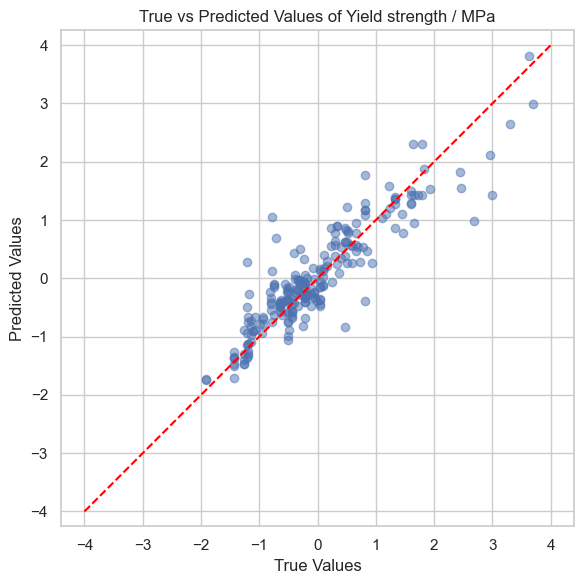

In [66]:
from sklearn.metrics import r2_score

# Initialize the model
model_name = 'XGBoost'
semi_supervised_model = best_model_final

# Fit the model on the expanded labeled dataset
semi_supervised_model.fit(X_current, Y_current)

# Perform cross-validation
neg_mse_ss = cross_val_score(semi_supervised_model, X_current, Y_current, 
                             cv=5, scoring='neg_mean_squared_error')
rmse_ss = np.sqrt(-neg_mse_ss)
cv_results[f'Self-Training {model_name}'] = rmse_ss

print(f"Self-Training {model_name} - RMSE: {rmse_ss.mean():.2f} ± {rmse_ss.std():.2f}")

# RMSE with X_test_labeled and y_test_labeled
y_pred = semi_supervised_model.predict(X_test_labeled_pca.drop("group_id", axis=1))
r2 = r2_score(y_test_labeled, y_pred)
print(f"Self-Training {model_name} - R² on test set: {r2:.2f}")
rmse_test = np.sqrt(mean_squared_error(y_test_labeled, y_pred))
print(f"Self-Training {model_name} - RMSE on test set: {rmse_test:.2f}")

# Plot the predictions
plt.figure(figsize=(6, 6))
plt.scatter(y_test_labeled, y_pred, alpha=0.5)
plt.plot([-4, 4], [-4, 4], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values of ' + target)
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling for x and y axes
plt.tight_layout()
plt.show()

In [183]:
from sklearn.model_selection import RandomizedSearchCV, GroupKFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def train_predict_sequential(targets, X_train, Y_train, X_test, Y_test, models, param_distributions, group_kfold, numerical_cols_X, pca_model, scaler_X, scaler_Y):
    """
    Train models on a list of target variables sequentially, using the predictions of previous targets as features for subsequent ones.

    Parameters:
    - targets: list of target variables in the order they should be predicted.
    - X_train: feature matrix for training.
    - Y_train: target matrix for training (all targets).
    - X_test: feature matrix for testing.
    - Y_test: target matrix for testing (all targets).
    - models: dictionary of models to use.
    - param_distributions: dictionary of hyperparameter distributions for RandomizedSearchCV.
    - group_kfold: GroupKFold object for cross-validation.
    - numerical_cols_X: list of numerical columns.
    - pca_model: PCA model for transforming features.
    - scaler_X: scaler for input features.
    - scaler_Y: scaler for target variables.

    Returns:
    - X_train_with_preds: updated training data with predictions for each target.
    - X_test_with_preds: updated test data with predictions for each target.
    - cv_results: dictionary of cross-validation results for each target.
    """

    # Initialize containers for results
    X_train_with_preds = X_train.copy()
    X_test_with_preds = X_test.copy()
    cv_results = {}


    # Perform PCA transformation on training and test data
    X_train_with_preds = pca_model.fit_transform(X_train_with_preds[numerical_cols_X])
    X_test_with_preds = pca_model.transform(X_test_with_preds[numerical_cols_X])

    # Convert back to DataFrame
    X_train_with_preds = pd.DataFrame(X_train_with_preds, columns=[f'PC{i+1}' for i in range(X_train_with_preds.shape[1])])
    X_test_with_preds = pd.DataFrame(X_test_with_preds, columns=[f'PC{i+1}' for i in range(X_test_with_preds.shape[1])])

    # Put back the non-numerical columns
    X_train_with_preds = pd.concat([X_train_with_preds, X_train.drop(numerical_cols_X, axis=1).reset_index(drop=True)], axis=1)
    X_test_with_preds = pd.concat([X_test_with_preds, X_test.drop(numerical_cols_X, axis=1).reset_index(drop=True)], axis=1)

    for target in targets:
        print(f"\nTraining model for target: {target}")

        # Define y_train and y_test for the current target
        y_train = Y_train[target]
        y_test = Y_test[target]

        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)

        # Mask for labeled data
        labeled_mask = y_train.notnull()
        labeled_mask_test = y_test.notnull()

        # Labeled training data
        X_train_labeled = X_train_with_preds[labeled_mask]
        y_train_labeled = y_train[labeled_mask]

        # Check lengths
        print("Labeled training set shape:", X_train_labeled.shape)
        print("Labeled target shape:", y_train_labeled.shape)

        # Labeled test data
        X_test_labeled = X_test_with_preds[labeled_mask_test]
        y_test_labeled = y_test[labeled_mask_test]

        best_model = None
        best_rmse = float('inf')

        # Hyperparameter tuning and cross-validation for each model
        for name, model in models.items():
            if name in param_distributions:  # Perform RandomizedSearchCV for models with hyperparameters
                random_search = RandomizedSearchCV(
                    estimator=model,
                    param_distributions=param_distributions[name],
                    n_iter=5,
                    cv=group_kfold,
                    scoring='neg_mean_squared_error',
                    random_state=42,
                    n_jobs=-1
                )
                random_search.fit(X_train_labeled.drop("group_id", axis=1), y_train_labeled, groups=X_train_labeled["group_id"])
                best_model = random_search.best_estimator_
                print(f"Best hyperparameters for {name}: {random_search.best_params_}")
            else:
                # Fit the model without hyperparameter tuning
                best_model = model
                best_model.fit(X_train_labeled.drop("group_id", axis=1), y_train_labeled)

            # Perform cross-validation and track best model based on RMSE
            neg_mse = cross_val_score(best_model, X_train_labeled.drop("group_id", axis=1), y_train_labeled,
                                      cv=group_kfold, groups=X_train_labeled["group_id"], scoring='neg_mean_squared_error')
            rmse = np.sqrt(-neg_mse)
            print(f"{name} - CV RMSE: {rmse.mean():.2f} ± {rmse.std():.2f}")

            if rmse.mean() < best_rmse:
                best_rmse = rmse.mean()
                best_model_final = best_model

        # Make predictions with the best model
        y_test_pred = best_model_final.predict(X_test_labeled.drop("group_id", axis=1))

        # Evaluate the model on the test set
        rmse_test = np.sqrt(mean_squared_error(y_test_labeled, y_test_pred))

        # Store cross-validation results
        cv_results[target] = best_rmse
        print(f"\nBest model for {target}: {best_model_final.__class__.__name__} with RMSE: {rmse_test:.2f}")

        # Make predictions for all data (not just labeled)
        y_train_pred_all = best_model_final.predict(X_train_with_preds.drop("group_id", axis=1))
        y_test_pred_all = best_model_final.predict(X_test_with_preds.drop("group_id", axis=1))

        # Store predictions as new features for the next target
        X_train_with_preds[target] = y_train_pred_all
        X_test_with_preds[target] = y_test_pred_all

    return X_train_with_preds, X_test_with_preds, cv_results

# Example usage
targets = ['50% FATT', 'Reduction of Area / %', 'Elongation / %', 'Ultimate tensile strength / MPa', 'Yield strength / MPa', 'Charpy impact toughness / J']
X_train_with_preds, X_test_with_preds, cv_results = train_predict_sequential(
    targets, X_train_final, Y_train_scaled, X_test_final, Y_test_scaled,
    models, param_distributions, group_kfold, numerical_cols_X, pca, scaler_X, scaler_Y
)



Training model for target: 50% FATT
Labeled training set shape: (23, 44)
Labeled target shape: (23,)
Linear Regression - CV RMSE: 4.40 ± 6.66
Best hyperparameters for Random Forest: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Random Forest - CV RMSE: 0.74 ± 0.21
Best hyperparameters for Gradient Boosting: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting - CV RMSE: 0.65 ± 0.35
Best hyperparameters for Support Vector Machine: {'kernel': 'poly', 'epsilon': 1.0, 'C': 100.0}
Support Vector Machine - CV RMSE: 0.76 ± 0.19
Best hyperparameters for XGBoost: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.021544346900318832, 'colsample_bytree': 0.5}
XGBoost - CV RMSE: 0.73 ± 0.23

Best model for 50% FATT: GradientBoostingRegressor with RMSE: 0.51

Training model for target: Reduction of Area / %
Labeled training set shape: (862, 45)
Labeled target shape: (862,)
Linear Regression -

Results from the sequential prediction of the target variables are not good enough to be used in production. We will use one model for each target variable, and will not use the predicted values of the previous target variable as features for the next target variable.